# Problema 8 Computer Vision.

## Introducción

La visión por computadora es un campo de la inteligencia artificial que se ocupa de capacitar a los sistemas para que comprendan y procesen imágenes y videos de la misma manera que lo hacen los seres humanos. En este caso, los participantes deberán desarrollar modelos de clasificación de imágenes capaces de identificar con precisión el estado de frescura de diferentes tipos de frutas y verduras.

## Importancia

La capacidad de contar con un modelo que pueda anticipar la frescura de las frutas y verduras tiene importantes consecuencias para las empresas. En el sector alimentario, la calidad de los productos es fundamental tanto para la satisfacción del cliente como para la seguridad alimentaria. Contar con un sistema automatizado que pueda detectar y clasificar de manera precisa los alimentos frescos y en mal estado permite a las empresas tomar decisiones informadas sobre el manejo de la cadena de suministro, la gestión del inventario y la entrega de productos de calidad a los consumidores. Además, contribuye a reducir el desperdicio de alimentos al identificar y descartar los alimentos en mal estado de manera oportuna.

## Desarrollo del problema técnico

Los participantes deberán utilizar un conjunto de datos que contiene una amplia variedad de imágenes de frutas y verduras capturadas en diferentes condiciones de iluminación, ángulos y fondos. Cada imagen está etiquetada para indicar si el artículo es fresco o podrido/pasado. El desafío consiste en desarrollar un modelo de clasificación de imágenes que pueda identificar correctamente el estado de frescura de los diferentes tipos de productos.
Los participantes deberán entrenar y evaluar sus modelos de aprendizaje profundo, como redes neuronales convolucionales (CNN), para lograr la máxima precisión en la clasificación. Se anima a explorar y utilizar modelos pre entrenados y realizar ajuste fino. El objetivo final es desarrollar un modelo de clasificación de imágenes preciso y robusto que pueda aplicarse en diversas aplicaciones.

#### Tip: Respetar y explicar los supuestos de los modelos utilizados.

El juego de datos de prueba (test dataset) para la evaluación de los modelos será el último 10% del juego de datos. Se evaluarán las siguientes métricas: 

Accuracy, Recall, Precision, F1-score, Confusion Matrix, AUC-ROC Curve.

## Información sobre el conjunto de datos.

Variedad de imágenes: el conjunto de datos contiene una cantidad sustancial de imágenes, con una variación significativa en las condiciones de iluminación, los ángulos y los fondos. Esta diversidad ayuda a imitar escenarios del mundo real y desafía los modelos de clasificación para que sean sólidos y precisos en diversas condiciones.

Niveles de frescura: el conjunto de datos proporciona una distinción clara entre los estados fresco y podrido/rancio, lo que permite el entrenamiento de modelos capaces de identificar con precisión el nivel de descomposición en frutas y verduras.

Anotación: Cada imagen en el conjunto de datos está cuidadosamente etiquetada con las anotaciones apropiadas que indican si el elemento está fresco o podrido/rancia. Esto permite el aprendizaje supervisado y facilita el desarrollo de modelos de clasificación.

Imágenes de alta calidad: el conjunto de datos incluye imágenes de alta resolución capturadas con cámaras de nivel profesional. Las imágenes se editan meticulosamente para garantizar la claridad y eliminar el ruido, lo que brinda una base sólida para entrenar modelos de clasificación confiables.

Gran escala: con miles de imágenes disponibles, el conjunto de datos ofrece un volumen significativo de datos adecuados para entrenar modelos de aprendizaje profundo. Esto permite una capacitación y validación más amplias, lo que lleva a modelos de clasificación más sólidos y precisos.

## Importar paquetes

Se importan los paquetes a utilizar en la solución del ejercicio.

In [1]:
import os
# Suppress TensorFlow logs (0: all logs, 1: INFO, 2: WARNING, 3: ERROR)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from pathlib import Path
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import DataFrame
from PIL import Image
import numpy as np
import json
import pickle



## Exploración de Datos

El análisis exploratorio de datos (EDA) en problemas de clasificación de imágenes ofrece una serie de ventajas fundamentales. En primer lugar, permite obtener una comprensión del conjunto de datos, revelando información sobre el tamaño, resolución, distribución de clases y posibles desequilibrios en los datos. El EDA también facilita la detección de imágenes corruptas, mal etiquetadas o duplicadas, lo que es crucial para limpiar y preparar el conjunto de datos antes del entrenamiento del modelo.

Se analizan los siguientes puntos:

- Balance de las distintas clases
- Cantidad de muestras en los conjuntos de entrenamiento y prueba
- Dimesiones de las imágenes

In [2]:
# Define basic paths

data_path = Path("data/dataset")
train_path = data_path / "Train"
test_path = data_path / "Test"
metrics_path = Path("metrics")
models_path = Path("model")

### Recopilar información de imágenes

Se recopila información sobre las imágenes del conjunto de datos y se guardan en un DataFrame con columnas:

- Class: Etiqueta del conjunto de datos.
- Height: Alto de la imagen.
- Width: Ancho de la imagen.
- IsFresh: Si la clase de la muestra es de una fruta fresca.
- IsRotten: Si la clase de la muestra es de una fruta podrida.
- Name: Nombre de la fruta representada.

In [3]:
from typing import Tuple

def get_image_dimensions(image_path: Path) -> Tuple[int,int]:
    """
    Given a `image_path` return the width and height of the image
    """
    with Image.open(image_path) as img:
        width, height = img.size
        return width, height

def get_directory_images_info(path: Path) -> DataFrame:
    """
    Return a dataframe containing the class, width and height of all images in `path`.
    """
    df = {
        "Class": [],
        "Width": [],
        "Height": [],
    }
    
    for image_class in path.iterdir():
        print(image_class)
        for image_path in image_class.iterdir():
            width, height = get_image_dimensions(image_path)
            df["Class"].append(image_class.name)
            df["Width"].append(width)
            df["Height"].append(height)
    
    return DataFrame(df)

In [4]:
train_info_df = get_directory_images_info(train_path)
test_info_df = get_directory_images_info(test_path)

def preprocess_dataframe(df):
    """
    Given a dataframe `df` containing information about the images, 
    return a dataframe containing new columns: IsFresh, IsRotten and Name. 
    """
    df = df.copy()
    
    # Add column for 'fresh' check
    df['IsFresh'] = df['Class'].apply(lambda x: x.startswith('fresh'))

    # Add column for 'rotten' check
    df['IsRotten'] = df['Class'].apply(lambda x: x.startswith('rotten'))

    # Add column for name after removing prefix
    df['Name'] = df['Class'].apply(lambda x: x.replace('rotten', '').replace('fresh', ''))

    return df

processed_train_df = preprocess_dataframe(train_info_df)
processed_test_df = preprocess_dataframe(test_info_df)

data/dataset/Train/freshapples
data/dataset/Train/freshbanana
data/dataset/Train/freshbittergroud
data/dataset/Train/freshcapsicum
data/dataset/Train/freshcucumber
data/dataset/Train/freshokra
data/dataset/Train/freshoranges
data/dataset/Train/freshpotato
data/dataset/Train/freshtomato
data/dataset/Train/rottenapples
data/dataset/Train/rottenbanana
data/dataset/Train/rottenbittergroud
data/dataset/Train/rottencapsicum
data/dataset/Train/rottencucumber
data/dataset/Train/rottenokra
data/dataset/Train/rottenoranges
data/dataset/Train/rottenpotato
data/dataset/Train/rottentomato
data/dataset/Test/freshapples
data/dataset/Test/freshbanana
data/dataset/Test/freshbittergroud
data/dataset/Test/freshcapsicum
data/dataset/Test/freshcucumber
data/dataset/Test/freshokra
data/dataset/Test/freshoranges
data/dataset/Test/freshpotato
data/dataset/Test/freshtomato
data/dataset/Test/rottenapples
data/dataset/Test/rottenbanana
data/dataset/Test/rottenbittergroud
data/dataset/Test/rottencapsicum
data/dat

### Balance de los datos

- Se observa un desbalance entre las cantidades de muestras entre frutas.
- Dentro de las misma fruta los datos se encuentran balanceados entre frescos y podridos.
- Tomando en cuenta solamente la frescura de los elementos, los datos están balanceados.

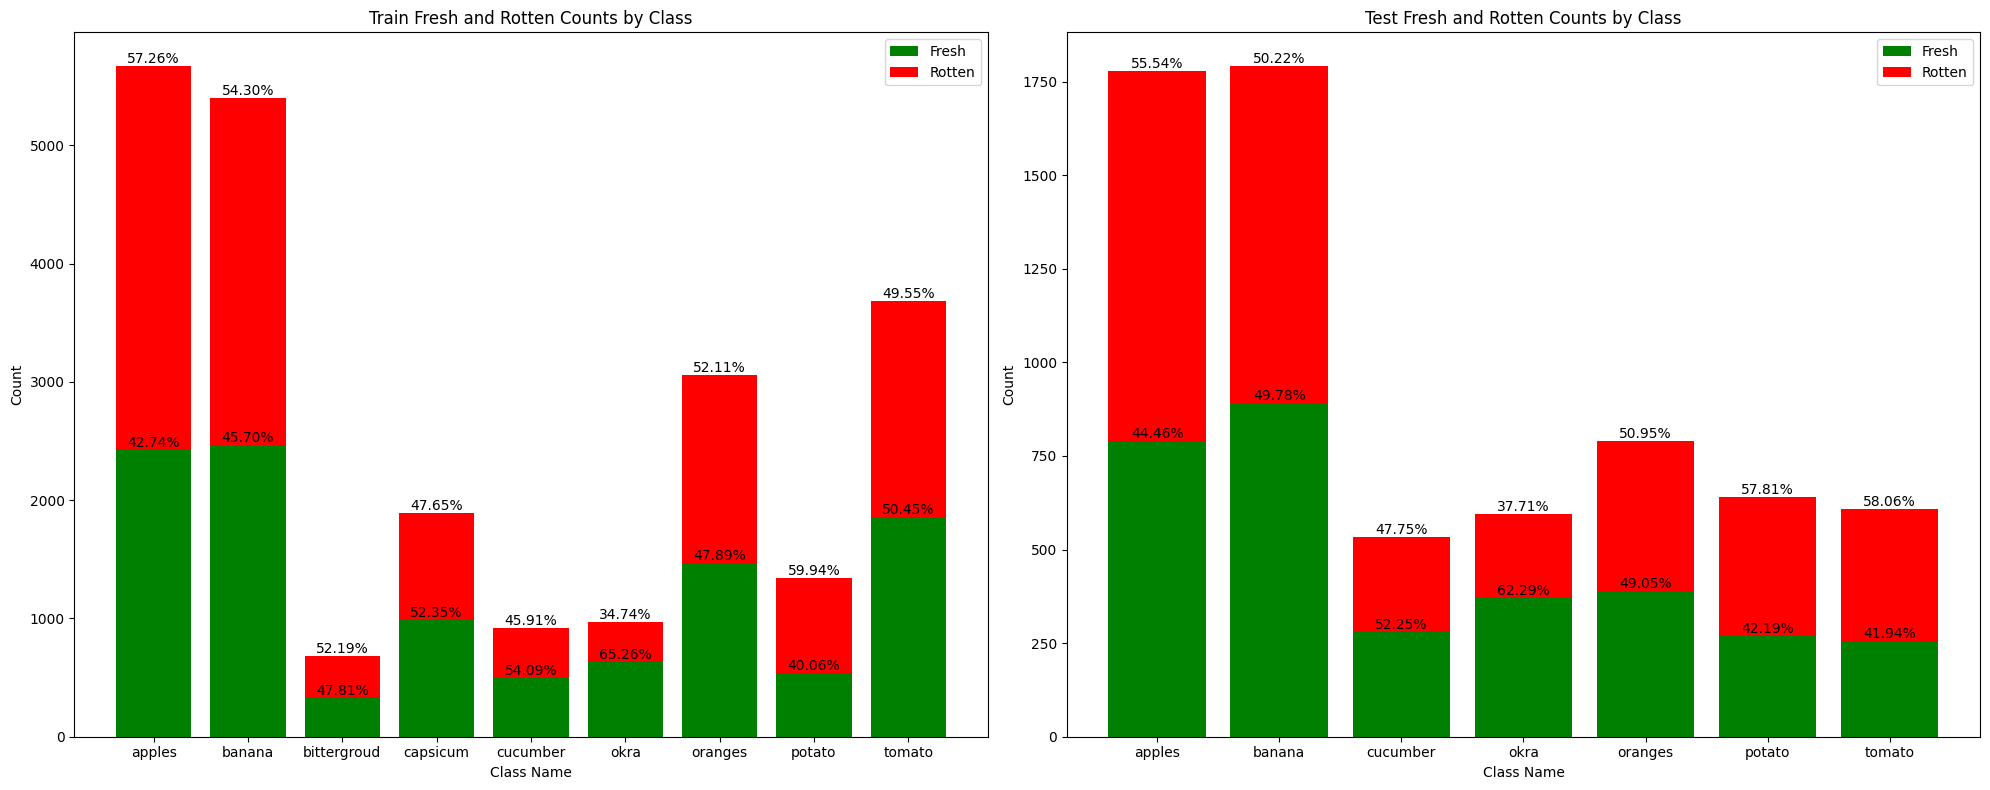

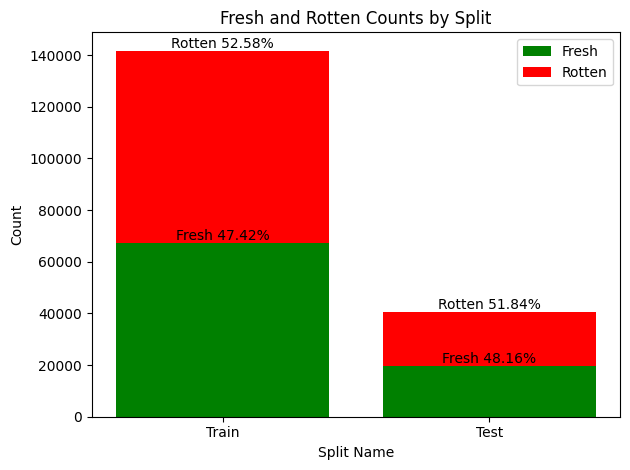

In [8]:
def plot_fruit_info(train_df: DataFrame, test_df: DataFrame, metric_path):
    """
    Plot information about the dataset balance between classes.
    
    train_ds: Dataframe containing information about train samples
    test_ds: Dataframe containing information about test samples
    metric_path: Base path to save the plots.
    """

    # Set the figure size
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    def process_df(ax, df: DataFrame, split: str):
        # Group the DataFrame by 'Name' column and calculate the fresh and rotten counts
        counts = df.groupby('Name').sum()

        # Get the class names and corresponding fresh and rotten counts
        class_names = counts.index
        fresh_counts = counts['IsFresh']
        rotten_counts = counts['IsRotten']

        # Plot the stacked bar chart
        ax.bar(class_names, fresh_counts, label='Fresh', color='green')
        ax.bar(class_names, rotten_counts, bottom=fresh_counts, label='Rotten', color='red')

        for i, (fresh_count, rotten_count) in enumerate(zip(fresh_counts, rotten_counts)):
            total_count = fresh_count + rotten_count
            fresh_percentage = (fresh_count / total_count) * 100
            rotten_percentage = (rotten_count / total_count) * 100
            ax.text(i, fresh_count, f"{fresh_percentage:.2f}%", ha='center', va='bottom')
            ax.text(i, total_count, f"{rotten_percentage:.2f}%", ha='center', va='bottom')

        # Add labels and title
        ax.set_xlabel('Class Name')
        ax.set_ylabel('Count')
        ax.set_title(f'{split} Fresh and Rotten Counts by Class')

        # Add a legend
        ax.legend()
        
    def process_general_df(ax, df1: DataFrame, df2: DataFrame):
        fresh_counts1 = df1[df1["IsFresh"] == True].size
        fresh_counts2 = df2[df2["IsFresh"] == True].size

        rotten_counts1 = df1[df1["IsRotten"] == True].size
        rotten_counts2 = df2[df2["IsRotten"] == True].size

        # Get the class names and corresponding fresh and rotten counts
        class_names = ["Train", "Test"]
        fresh_counts = [fresh_counts1, fresh_counts2]
        rotten_counts = [rotten_counts1, rotten_counts2]

        # Plot the stacked bar chart
        ax.bar(class_names, fresh_counts, label='Fresh', color='green')
        ax.bar(class_names, rotten_counts, bottom=fresh_counts, label='Rotten', color='red')

        # Add labels and title
        ax.set_xlabel('Split Name')
        ax.set_ylabel('Count')
        ax.set_title(f'Fresh and Rotten Counts by Split')

        for i, (fresh_count, rotten_count) in enumerate(zip(fresh_counts, rotten_counts)):
            total_count = fresh_count + rotten_count
            fresh_percentage = (fresh_count / total_count) * 100
            rotten_percentage = (rotten_count / total_count) * 100
            ax.text(i, fresh_count, f"Fresh {fresh_percentage:.2f}%", ha='center', va='bottom')
            ax.text(i, total_count, f"Rotten {rotten_percentage:.2f}%", ha='center', va='bottom')

        # Add a legend
        ax.legend()

    process_df(ax1, train_df, "Train")
    process_df(ax2, test_df, "Test")
    fig.tight_layout()
    plt.savefig(metrics_path / "all_classes_dataset_info.png")
    plt.show()
    
    fig, ax3 = plt.subplots(1)
    process_general_df(ax3, train_df, test_df)
    fig.tight_layout()
    # Display the plot
    plt.savefig(metrics_path / "binary_dataset_info.png")
    plt.show()


plot_fruit_info(processed_train_df, processed_test_df, metrics_path)

### Análisis de las dimensiones de las imágenes

- La altura de la mayoría de las imágenes se encuentran entre 200 y 500 píxeles
- El ancho de la mayoría de las imágenes se encuentran entre 200 y 600 píxeles
- La proporción alto/ancho de la mayoría de las imágenes se encuentra entre 0.25 y 1.25 

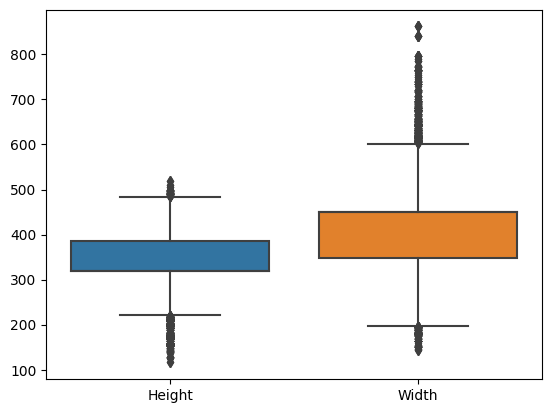

/tmp/ipykernel_15969/419451360.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Ratio"] = df["Height"] / df["Width"]


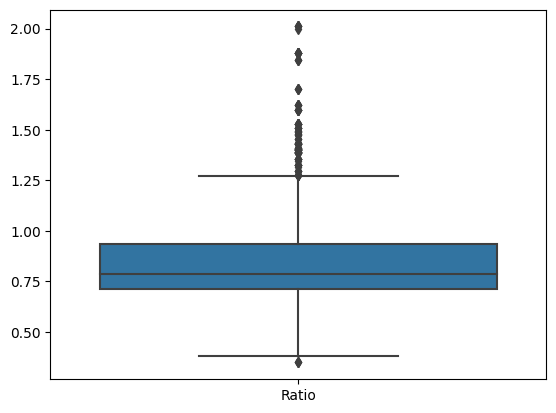

In [70]:
df = processed_test_df[["Height", "Width"]]
sns.boxplot(df)
plt.savefig(metrics_path / "size_dataset_info.png")
plt.show()
df["Ratio"] = df["Height"] / df["Width"]
sns.boxplot(df[["Ratio"]])
plt.savefig(metrics_path / "size_ratio_dataset_info.png")
plt.show()


### Resumen

- Los datos se encuentran divididos en diferentes tipos de clases representando frutas en dos estados:
  - Fresca
  - Podrida
- Los datos están bien balanceados entre frescos y podridos
- Las medidas de las fotos no son constantes y difieren en proporción alto y ancho.

## Preprocesamiento del conjunto de datos

El preprocesamiento de imágenes en una tarea de aprendizaje automático es vital porque mejora la calidad de los datos y prepara las imágenes para un entrenamiento eficaz del modelo. Escalar los valores de los píxeles a un rango común garantiza distribuciones de datos coherentes, reduciendo el riesgo de dominancia de características. Técnicas como el cambio de tamaño y la reducción del muestreo reducen la complejidad computacional, haciendo que el entrenamiento del modelo sea más rápido y eficiente. El aumento de datos incrementa la diversidad del conjunto de datos, lo que mejora la generalización y la solidez del modelo. En general, el preprocesamiento de imágenes optimiza el proceso de aprendizaje, mejorando el rendimiento del modelo y aumentando las posibilidades de éxito del aprendizaje automático.

Para el preprocesamiento en primer lugar se crean los conjuntos de datos con los que se trabajará:

- Entrenamiento: 18896 elementos (representa el 80% de las muestras encontradas en la sección de entrenamiento original)
- Validación: 4723 elementos (representa el 20% de las muestras encontradas en la sección de entrenamiento original)
- Prueba: 6738 elementos

Se arreglan algunas etiquetas del conjunto de datos:

- Se renombran las clases en el conjunto de datos de pruebas para que coincidan con los nombres del conjunto de entrenamiento:
  - freshtamto -> freshtomato
  - rottentamto -> rottentomato
  - rottenpatato -> rottenpotato
  - freshpatato -> freshpotato
- Se agregan carpetas para clases que están en el conjunto de entrenamiento pero no están representadas en el conjunto de pruebas.
  - freshbittergroud
  - rottenbittergroud
  - freshcapsicum
  - rottencapsicum


In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = (256, 256)
RANDOM_SEED = 1234

# Get train and validation data
train_ds, validation_ds = tf.keras.utils.image_dataset_from_directory(train_path,
        batch_size=BATCH_SIZE,
        image_size=IMAGE_SIZE,
        seed=RANDOM_SEED,
        validation_split=0.2,
        subset="both",
        label_mode="categorical",
        crop_to_aspect_ratio=False,
    )

train_class_names = train_ds.class_names

# Fix classes in test data
rename_in_test = {
    "freshtamto": "freshtomato",
    "rottentamto": "rottentomato",
    "rottenpatato": "rottenpotato",
    "freshpatato": "freshpotato",
}
to_add_classes = [x for x in train_class_names]
for path in test_path.iterdir():
    name = path.name
    if name in rename_in_test:
        # Rename class names
        current_path = test_path / name
        name = rename_in_test[name]
        current_path.rename(test_path / name)
    if name in to_add_classes:
        # Remove classes that already are in test data to only keep the
        # classes to be added
        to_add_classes.remove(name)
# Add missing classes
for to_add in to_add_classes:
    new_class = test_path / to_add
    new_class.mkdir()
    print("Created folder for class:", to_add)

# Get test data with correct classes
test_ds = tf.keras.utils.image_dataset_from_directory(test_path,
        batch_size=BATCH_SIZE,
        image_size=IMAGE_SIZE,
        seed=RANDOM_SEED,
        label_mode="categorical",
        crop_to_aspect_ratio=False,
        class_names=train_ds.class_names,
        shuffle=False,
    )


CLASS_AMOUNT = len(train_class_names)

test_class_names = test_ds.class_names

# Sanity checks
assert CLASS_AMOUNT == 18
assert len(test_class_names) == len(train_class_names)


Found 23619 files belonging to 18 classes.
Using 18896 files for training.
Using 4723 files for validation.
Found 6738 files belonging to 18 classes.


### Visualización de imágenes del conjunto de datos
 

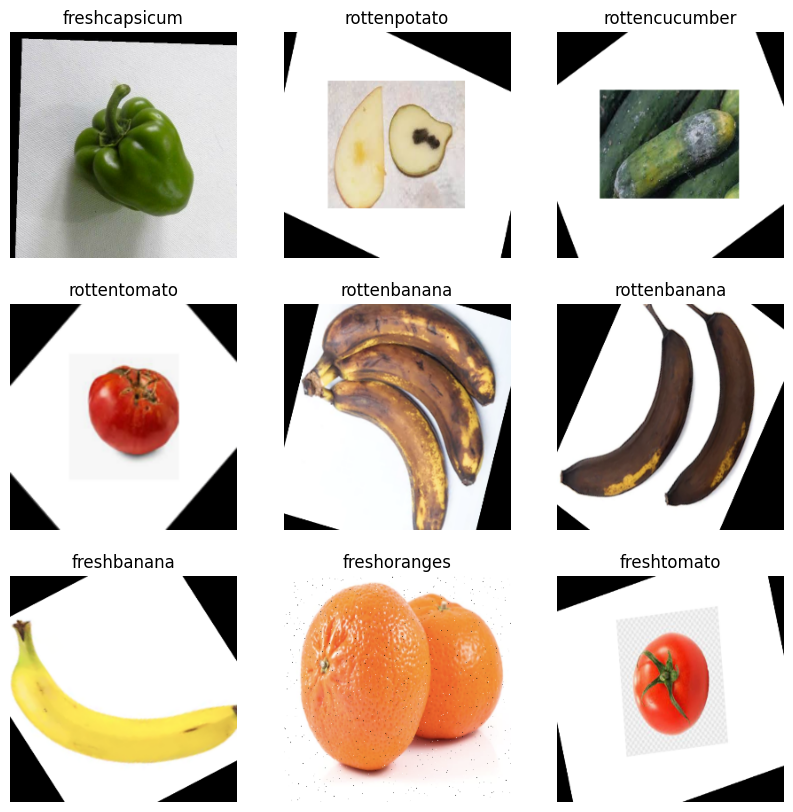

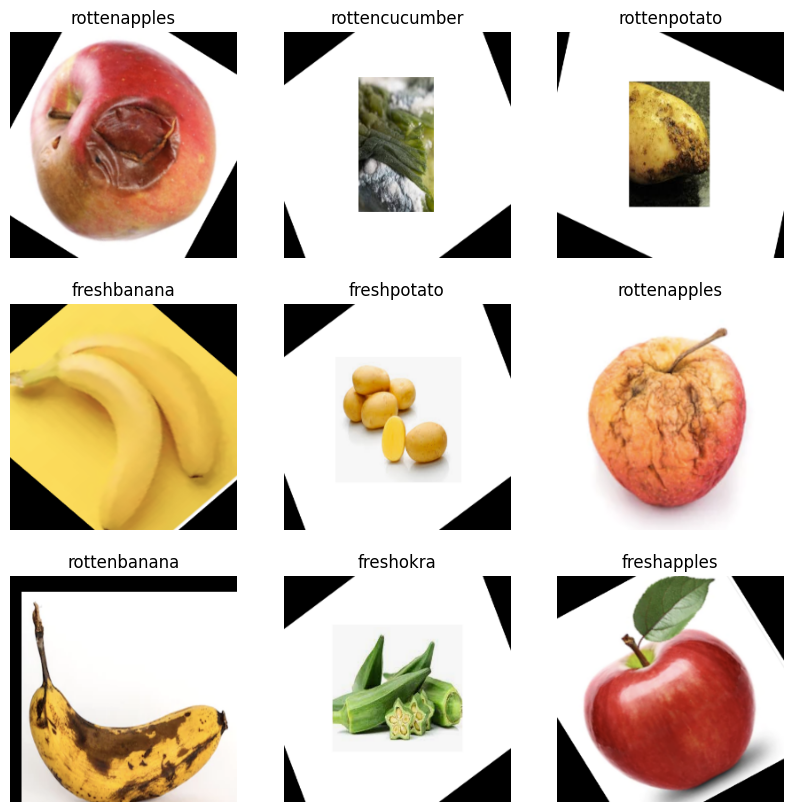

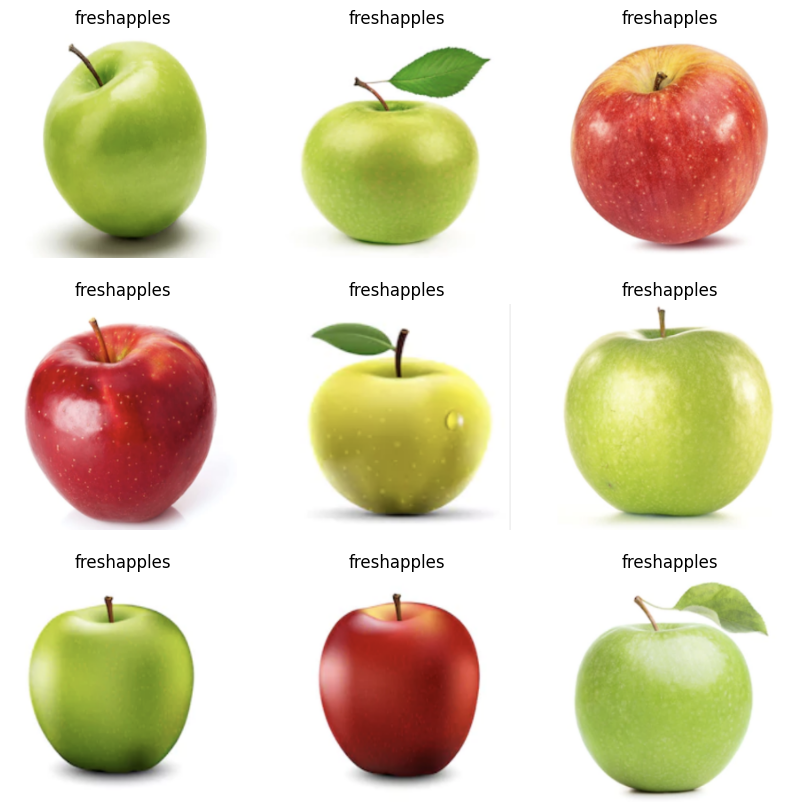

In [4]:

def show_images(batches, class_names):
    plt.figure(figsize=(10, 10))
    for images, labels in batches:
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[tf.argmax(labels[i])])
            plt.axis("off")

show_images(train_ds.take(1), train_class_names)
show_images(validation_ds.take(1), train_class_names)
show_images(test_ds.take(1), test_class_names)

### Capas de preprocesamiento y aumento de datos

**Preprocesamiento:**

- Se rescala los valores de las imágenes del intervalo 0 a 255 al intervalo de 0 a 1.
- Se redimensiona las imágenes a 256 píxeles por 256 píxeles.

**Aumento de datos:**

- Se aumenta el tamaño de la imagen y luego se toman porciones aleatorias de 256 píxeles por 256 píxeles.
- Se voltea aleatoriamente la imagen de forma horizontal o vertical.
- Se rota aleatoriamente la imagen entre 0 y 180 grados
- Se hace zoom aleatoriamente a la imagen
- Se le añade o quita aleatoriamente brillo a la imagen

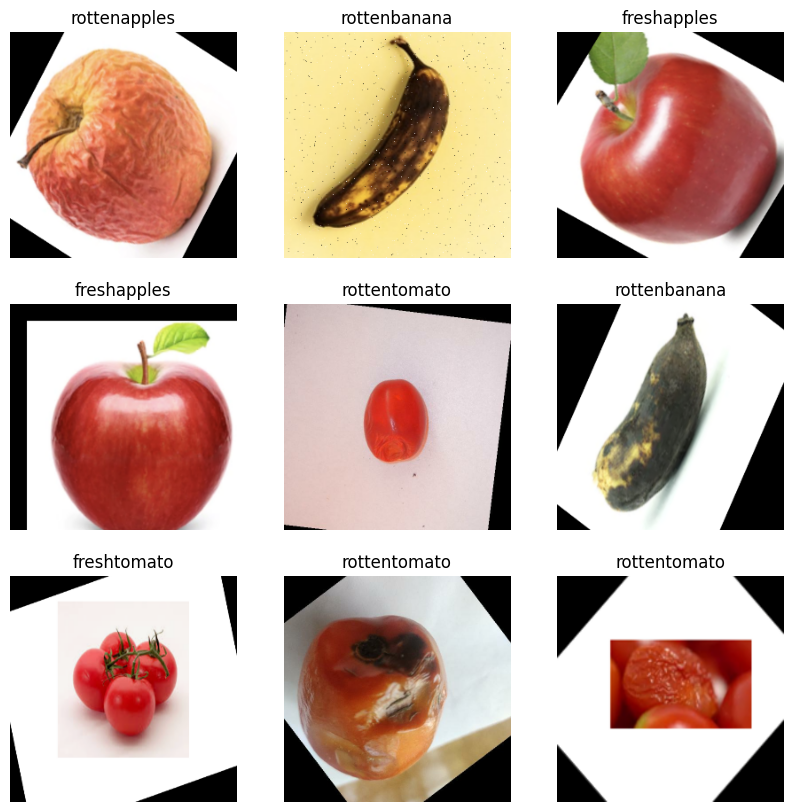

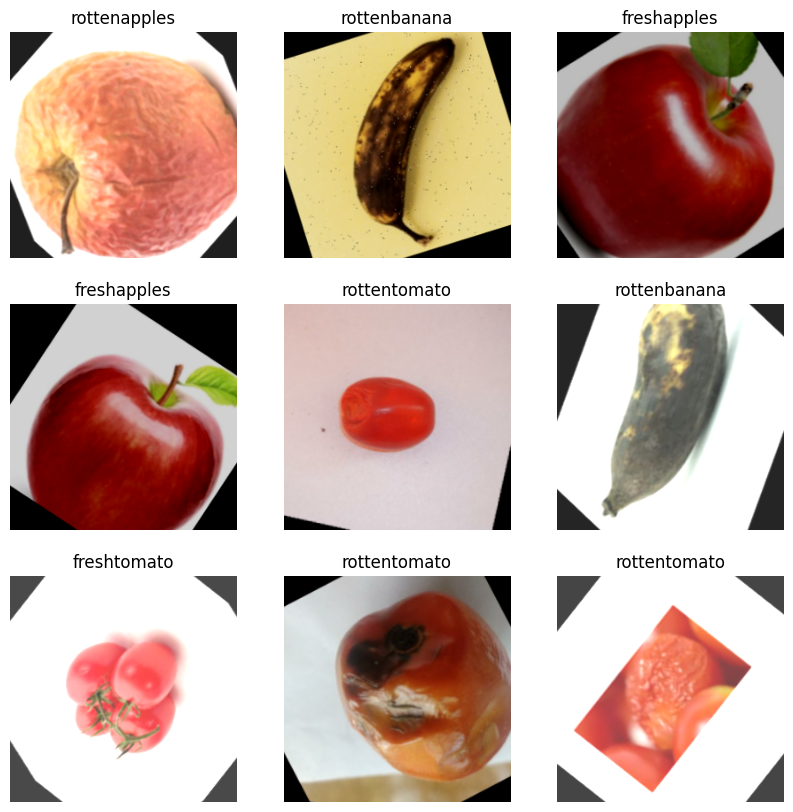

In [5]:
def preprocess_layers(input):
    input = tf.keras.layers.Rescaling(1./255)(input)
    input = tf.keras.layers.Resizing(IMAGE_SIZE[0], IMAGE_SIZE[1])(input)
    return input

def data_augmentation(input):
    # Add some space to the image
    input = tf.image.resize_with_crop_or_pad(input, IMAGE_SIZE[0] + 20, IMAGE_SIZE[1] + 20)
    # Randomly crop the image
    input = tf.keras.layers.RandomCrop(IMAGE_SIZE[0], IMAGE_SIZE[1])(input)
    # Randomly flip the image
    input = tf.keras.layers.RandomFlip()(input)
    # Randomly rotate the image
    input = tf.keras.layers.RandomRotation((0.0, 0.5), fill_mode="constant", fill_value=0)(input)
    # Randomly zoom in the image
    input = tf.keras.layers.RandomZoom((-0.2, 0.0))(input)
    # Randomly add brightness to the image
    input = tf.keras.layers.RandomBrightness((-0.3, 0.3), (0.0, 1.0))(input)
    input = tf.clip_by_value(input, 0, 1)
    return input

item, labels = list(train_ds.take(1))[0]

new_item = tf.cast(data_augmentation(preprocess_layers(item)) * 255, dtype='uint8')

show_images(tf.data.Dataset.from_tensors((item, labels)), train_class_names)
show_images(tf.data.Dataset.from_tensors((new_item, labels)), train_class_names)


## Modelos

Los modelos seleccionados provienen de dos tipos de arquitecturas, ResNet y Xception. Estos modelos fueron seleccionados por su balance entre tamaño y rendimiento, ya que contienen menos parámetros que otros modelos similares y también presentan un buen rendimiento.

### ResNet

La arquitectura ResNet (Residual Network) es un modelo de aprendizaje profundo diseñado para extracción de atributos en imágenes. Fue introducida en 2015 y desde entonces se ha convertido en un elemento fundamental para diversas aplicaciones de visión por computadora. ResNet aborda el reto de entrenar redes neuronales muy profundas mediante la introducción de conexiones residuales, también conocidas como conexiones de salto o conexiones de atajo.

La idea clave de ResNet es el uso de bloques residuales, que permiten a la red aprender mapeos residuales en lugar de intentar aprender mapeos directos. En las redes profundas tradicionales, añadir más capas puede provocar una degradación del rendimiento debido a la desaparición de gradientes o a dificultades en el entrenamiento. Sin embargo, con las conexiones residuales, la información de la capa anterior puede propagarse directamente a las capas posteriores, lo que facilita al modelo el aprendizaje y la optimización del mapeo subyacente.

La arquitectura de ResNet suele incluir varios bloques residuales apilados, cada uno de los cuales contiene capas convolucionales y conexiones de acceso directo. Mediante el uso de estos bloques residuales, ResNet puede alcanzar una gran profundidad, evitando problemas de degradación en los resultados.

### Xception

La arquitectura Xception es un modelo de aprendizaje profundopara extracción de atributos en imágenes presentado en 2016. Xception son las siglas de "Extreme Inception" y se basa en la arquitectura Inception, que utiliza una combinación de diferentes filtros convolucionales para la extracción de características.

La principal innovación de Xception es el uso de convoluciones separables en profundidad. En lugar de realizar convoluciones en todos los canales de entrada simultáneamente, Xception separa la convolución espacial de la convolución en profundidad, lo que reduce el número de parámetros y la complejidad computacional. Este diseño permite a Xception alcanzar un rendimiento similar o incluso superior al de las arquitecturas tradicionales, al tiempo que resulta más eficiente desde el punto de vista computacional. Aunque en teoría el costo computacional es menor, en la práctica no se evidencia tanto la reducción debido a que los GPUs no están optimizados para el trabajo con este tipo de capas.

### Modelos finales

Se prueban tres modelos para la solución del problema:

- ResNet20
- ResNet50V2
- Xception

In [19]:
def compile_classification_model(model, initial_learning_rate=0.1, from_logits=False):
    """
    Compile a classification model with predefine optimizer, metrics and loss function.
    
    model: Classification model
    initial_learning_rate: Initial learning rate for Adam optimizer
    from_logits: If the model return without normalize to a probability distribution the last layer 
    """
    # Optimizer
    optimizer = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)

    # Loss function
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=from_logits)

    # Metrics
    metrics = [
      tf.keras.metrics.CategoricalAccuracy(),
      tf.keras.metrics.F1Score(name="F1Score", average="macro"),
      tf.keras.metrics.Precision(name="Precision"),
      tf.keras.metrics.Recall(name="Recall"),
      tf.keras.metrics.AUC(name="AUC-ROC"),
    ]
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

def train_classification_model(model, train_ds, validation_ds, checkpoint_path, epochs):
    """
    Train a classification model with the given datasets and default callbacks and 
    
    model: Classification model
    train_ds: Train dataset
    validation_ds: Validation dataset
    checkpoint_path: Where to save the best model
    epochs: Epochs to train the model
    """
    # Callback
    callbacks = [
      # Early stopping training when no improvement for 20 epochs
      tf.keras.callbacks.EarlyStopping(patience=20),
      # Divide learning rate by 10 when no improvement for 10 epochs
      tf.keras.callbacks.ReduceLROnPlateau(
        patience=10,
        factor=0.1,
        min_lr=1e-5,
      ),
      # Save callback
      tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_path,
        save_best_only=True,
      )
    ]

    history = model.fit(
        train_ds, 
        validation_data=validation_ds, 
        epochs=int(epochs),
        callbacks=callbacks)
    return history

### ResNet20

Modelo basado en la arquitectura ResNet. Contiene 20 capas divididas en 5 bloques.

![Resnet20](images/resnet20.png)

In [71]:
def conv_block(filters, kernel_size=3, strides=1, padding='same'):
    """
    Return a single ResNet Convolutional Block
    
    filters: How many filters should have the block.
    kernel_size: Kernel size of the block.
    strides: Strides of the convolutional block.
    padding: Padding of the convolutional block.
    """
    return tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters, kernel_size, strides=strides, padding=padding, use_bias=False),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
    ])
   
def res_conv_block(x, filters, kernel_size=3, levels=2, downsample=False):
    """
    Return a single ResNet Resisudal Block

    x: Input
    filters: How many filters should the layers apply.
    kernel_size: Convolutional kernel size.
    levels: How many convolutional leveles should the block have.
    downsample: If the input should halve its dimension at the first step
    """
    first_stride = 2 if downsample else 1
    # First block item
    y = conv_block(filters, kernel_size=kernel_size, strides=first_stride)(x)
    # Build the rest of the block
    for i in range(levels - 1):
        y = conv_block(filters, kernel_size=kernel_size)(y)
    if downsample:
        # Adjust x dimension
        x = conv_block(filters, kernel_size=1, strides=2, padding='valid')(x)
    return tf.keras.layers.Add()([y, x])

def resnet_34(input, classification_classes=2):
    """
    Creates a 34 layer ResNet model.
    
    input: Input layer.
    classification_classes: Number of classes to classify the image.
    """
    # Initial block
    y = conv_block(64, 7, strides=2)(input)
    y = tf.keras.layers.MaxPooling2D(3, 2, padding='same')(y)

    for _ in range(3):
        y = res_conv_block(y, 64)

    y = res_conv_block(y, 128, downsample=True)
    for _ in range(3):
        y = res_conv_block(y, 128)

    y = res_conv_block(y, 256, downsample=True)
    for _ in range(5):
        y = res_conv_block(y, 256)

    y = res_conv_block(y, 512, downsample=True)
    for _ in range(2):
        y = res_conv_block(y, 512)

    y = tf.keras.layers.GlobalAveragePooling2D()(y)
    y = tf.keras.layers.Dense(classification_classes, activation='softmax')(y)

    return tf.keras.Model(inputs=input, outputs=y)

def resnet_20(input, classification_classes=2):
    """
    Creates a 20 layer ResNet model.
    
    input: Input layer.
    classification_classes: Number of classes to classify the image.
    """
    
    # Initial block
    y = conv_block(64, 7, strides=2)(input)
    y = tf.keras.layers.MaxPooling2D(3, 2, padding='same')(y)

    for _ in range(1):
        y = res_conv_block(y, 64)

    y = res_conv_block(y, 128, downsample=True)
    for _ in range(1):
        y = res_conv_block(y, 128)

    y = res_conv_block(y, 256, downsample=True)
    for _ in range(2):
        y = res_conv_block(y, 256)

    y = res_conv_block(y, 512, downsample=True)
    for _ in range(1):
        y = res_conv_block(y, 512)

    y = tf.keras.layers.GlobalAveragePooling2D()(y)
    y = tf.keras.layers.Dense(classification_classes, activation='softmax')(y)

    return tf.keras.Model(inputs=input, outputs=y)


In [9]:
def full_model_20(input, classification_classes):
    """
    Create the ResNet20 model with preprocessing and data augmentation layers.
    
    input: Input layer of the model
    classification_classes: Final numbers of classes
    """
    process = tf.keras.Sequential([
        tf.keras.layers.Lambda(preprocess_layers),
        tf.keras.layers.Lambda(data_augmentation),
    ])(input)
    return resnet_20(process, classification_classes)


### ResNet50V2 preentrenado

Se descargan los pesos del modelo ResNet50V2 entrenados con ImageNet.

- El modelo se utiliza para la extracción de atributos de las imágenes basándose en los pesos preentrenados con ImageNet.
- Las capas relacionadas a la tarea de clasificación del modelo original no es incluída. 

In [13]:
resnet_preprocess = tf.keras.applications.resnet.preprocess_input

In [14]:
base_resnet_imagenet_weights = Path("data") / "resnet_base"
base_resnet_imagenet_weights.mkdir(exist_ok=True)

# Download from https://storage.googleapis.com/tensorflow/keras-applications/resnet/resnet50v2_weights_tf_dim_ordering_tf_kernels_notop.h5
base_resnet_imagenet_weights /= "resnet50v2_weights_tf_dim_ordering_tf_kernels_notop.h5"

resnet_base_model = tf.keras.applications.ResNet50V2(
    weights=base_resnet_imagenet_weights,  # Load weights pre-trained on ImageNet.
    input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3),
    include_top=False)


### Xception preentrenado

Se descargan los pesos del modelo Xception entrenados con ImageNet.

- El modelo se utiliza para la extracción de atributos de las imágenes basándose en los pesos preentrenados con ImageNet.
- Las capas relacionadas a la tarea de clasificación del modelo original no es incluída. 

In [15]:
xception_preprocess = tf.keras.applications.xception.preprocess_input

In [16]:
base_xception_imagenet_weights = Path("data") /"xception_base"
base_xception_imagenet_weights.mkdir(exist_ok=True)
# Download from https://storage.googleapis.com/tensorflow/keras-applications/xception/xception_weights_tf_dim_ordering_tf_kernels_notop.h5
base_xception_imagenet_weights /= "xception_weights_tf_dim_ordering_tf_kernels_notop.h5"

xception_base_model = tf.keras.applications.Xception(
    weights=base_xception_imagenet_weights,  # Load weights pre-trained on ImageNet.
    input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3),
    include_top=False)


## Entrenamiento

Para el ejercicio el entrenamiento se divide en dos tipos:

- Entrenamiento clásico desde 0
- Transfer Learning

Cada uno de estos tiene sus ventajas y desventajas:

**Entrenar desde 0:**

- Ventajas:

    - Permite un control total sobre la arquitectura e hiperparámetros, lo que posibilita adaptar el modelo a necesidades específicas.
    - Evita posibles sesgos o artefactos presentes en modelos preentrenados que podrían no ser relevantes para la tarea objetivo.
    - Puede ser una buena opción cuando hay una cantidad limitada de recursos.

- Desventajas:

    - Requiere una gran cantidad de datos etiquetados y recursos computacionales para entrenar un modelo de **alto rendimiento** desde cero.
    - El entrenamiento desde cero puede ser lento, especialmente para arquitecturas profundas con numerosas capas.

**Transfer Learning**:

- Ventajas:

    - Aprovechar un modelo preentrenado ahorra tiempo y recursos computacionales, ya que la extracción de características principales ya se ha aprendido.
    - Ayuda a obtener un mejor rendimiento con conjuntos de datos etiquetados más pequeños, ya que el modelo ya ha aprendido características genéricas de grandes cantidades de datos.

- Desventajas:

    - El modelo preentrenado podría no ser óptimo para la tarea específica, ya que se entrenó en un conjunto de datos diferente con clases distintas.
    - El ajuste fino requiere una cuidadosa adaptación de los hiperparámetros para evitar la destrucción de lo aprendido y lograr una convergencia a una buena solución.
    - En algunos casos, la tarea objetivo podría tener características únicas que el modelo preentrenado no puede capturar completamente.

Durante el entrenamiento los pesos de los modelos son guardados así como el historial de entrenamiento. Esta información es utilizada para cargar de manera sencilla el modelo y también para tener idea de qué tan bien fue el proceso de entrenamiento.

### Entrenamiento ResNet20

In [10]:
input = tf.keras.layers.Input((IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
model_20 = full_model_20(input, CLASS_AMOUNT)
compile_classification_model(model_20)
model_20.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 sequential_1 (Sequential)   (None, 128, 128, 64)         9664      ['input_2[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 64, 64, 64)           0         ['sequential_1[1][0]']        
 D)                                                                                               
                                                                                                  
 sequential_2 (Sequential)   (None, 64, 64, 64)           37120     ['max_pooling2d[1][0]']   

In [12]:
epochs = 200
checkpoint_resnet_20_path = Path("model", "resnet20")
history_resnet_20_path = Path("model", "resnet20_history.obj")


In [13]:
history_20 = train_classification_model(model_20, train_ds, validation_ds, str(checkpoint_resnet_20_path), epochs)

with history_resnet_20_path.open('wb') as file:
    pickle.dump(history_20.history, file)


Epoch 1/200
591/591 [==============================] - ETA: 0s - loss: 1.7023 - categorical_accuracy: 0.4883 - F1Score: 0.3693 - Precision: 0.7066 - Recall: 0.3285 - AUC-ROC: 0.9265INFO:tensorflow:Assets written to: model/resnet20/assets


INFO:tensorflow:Assets written to: model/resnet20/assets


591/591 [==============================] - 106s 156ms/step - loss: 1.7023 - categorical_accuracy: 0.4883 - F1Score: 0.3693 - Precision: 0.7066 - Recall: 0.3285 - AUC-ROC: 0.9265 - val_loss: 1.8260 - val_categorical_accuracy: 0.5715 - val_F1Score: 0.4108 - val_Precision: 0.6198 - val_Recall: 0.5323 - val_AUC-ROC: 0.9175 - lr: 0.1000
Epoch 2/200
591/591 [==============================] - ETA: 0s - loss: 0.7184 - categorical_accuracy: 0.7362 - F1Score: 0.6184 - Precision: 0.7986 - Recall: 0.6713 - AUC-ROC: 0.9820INFO:tensorflow:Assets written to: model/resnet20/assets


INFO:tensorflow:Assets written to: model/resnet20/assets


591/591 [==============================] - 88s 147ms/step - loss: 0.7184 - categorical_accuracy: 0.7362 - F1Score: 0.6184 - Precision: 0.7986 - Recall: 0.6713 - AUC-ROC: 0.9820 - val_loss: 1.4781 - val_categorical_accuracy: 0.6115 - val_F1Score: 0.4534 - val_Precision: 0.6476 - val_Recall: 0.5907 - val_AUC-ROC: 0.9358 - lr: 0.1000
Epoch 3/200
591/591 [==============================] - 82s 137ms/step - loss: 0.5617 - categorical_accuracy: 0.7947 - F1Score: 0.6921 - Precision: 0.8383 - Recall: 0.7527 - AUC-ROC: 0.9883 - val_loss: 3.5691 - val_categorical_accuracy: 0.4336 - val_F1Score: 0.3273 - val_Precision: 0.4594 - val_Recall: 0.4063 - val_AUC-ROC: 0.8292 - lr: 0.1000
Epoch 4/200
591/591 [==============================] - ETA: 0s - loss: 0.4723 - categorical_accuracy: 0.8221 - F1Score: 0.7319 - Precision: 0.8561 - Recall: 0.7932 - AUC-ROC: 0.9912INFO:tensorflow:Assets written to: model/resnet20/assets


INFO:tensorflow:Assets written to: model/resnet20/assets


591/591 [==============================] - 89s 151ms/step - loss: 0.4723 - categorical_accuracy: 0.8221 - F1Score: 0.7319 - Precision: 0.8561 - Recall: 0.7932 - AUC-ROC: 0.9912 - val_loss: 0.8224 - val_categorical_accuracy: 0.7442 - val_F1Score: 0.6719 - val_Precision: 0.7612 - val_Recall: 0.7262 - val_AUC-ROC: 0.9730 - lr: 0.1000
Epoch 5/200
591/591 [==============================] - 82s 138ms/step - loss: 0.4074 - categorical_accuracy: 0.8477 - F1Score: 0.7679 - Precision: 0.8746 - Recall: 0.8245 - AUC-ROC: 0.9932 - val_loss: 0.9043 - val_categorical_accuracy: 0.7209 - val_F1Score: 0.6400 - val_Precision: 0.7646 - val_Recall: 0.6864 - val_AUC-ROC: 0.9701 - lr: 0.1000
Epoch 6/200
591/591 [==============================] - ETA: 0s - loss: 0.3694 - categorical_accuracy: 0.8607 - F1Score: 0.7825 - Precision: 0.8852 - Recall: 0.8407 - AUC-ROC: 0.9940INFO:tensorflow:Assets written to: model/resnet20/assets


INFO:tensorflow:Assets written to: model/resnet20/assets


591/591 [==============================] - 90s 151ms/step - loss: 0.3694 - categorical_accuracy: 0.8607 - F1Score: 0.7825 - Precision: 0.8852 - Recall: 0.8407 - AUC-ROC: 0.9940 - val_loss: 0.6692 - val_categorical_accuracy: 0.7895 - val_F1Score: 0.7519 - val_Precision: 0.8244 - val_Recall: 0.7557 - val_AUC-ROC: 0.9784 - lr: 0.1000
Epoch 7/200
591/591 [==============================] - 82s 138ms/step - loss: 0.3252 - categorical_accuracy: 0.8776 - F1Score: 0.8049 - Precision: 0.8977 - Recall: 0.8614 - AUC-ROC: 0.9952 - val_loss: 4.6247 - val_categorical_accuracy: 0.4499 - val_F1Score: 0.3634 - val_Precision: 0.4651 - val_Recall: 0.4427 - val_AUC-ROC: 0.7898 - lr: 0.1000
Epoch 8/200
591/591 [==============================] - 83s 139ms/step - loss: 0.2889 - categorical_accuracy: 0.8939 - F1Score: 0.8236 - Precision: 0.9108 - Recall: 0.8780 - AUC-ROC: 0.9957 - val_loss: 2.0509 - val_categorical_accuracy: 0.6879 - val_F1Score: 0.5532 - val_Precision: 0.7043 - val_Recall: 0.6792 - val_AUC-RO

INFO:tensorflow:Assets written to: model/resnet20/assets


591/591 [==============================] - 90s 152ms/step - loss: 0.2596 - categorical_accuracy: 0.9039 - F1Score: 0.8396 - Precision: 0.9166 - Recall: 0.8932 - AUC-ROC: 0.9964 - val_loss: 0.3127 - val_categorical_accuracy: 0.8878 - val_F1Score: 0.8199 - val_Precision: 0.9029 - val_Recall: 0.8725 - val_AUC-ROC: 0.9941 - lr: 0.1000
Epoch 11/200
591/591 [==============================] - 83s 139ms/step - loss: 0.2222 - categorical_accuracy: 0.9165 - F1Score: 0.8588 - Precision: 0.9271 - Recall: 0.9086 - AUC-ROC: 0.9973 - val_loss: 2.4124 - val_categorical_accuracy: 0.6581 - val_F1Score: 0.4628 - val_Precision: 0.6785 - val_Recall: 0.6498 - val_AUC-ROC: 0.8927 - lr: 0.1000
Epoch 12/200
591/591 [==============================] - 83s 141ms/step - loss: 0.2173 - categorical_accuracy: 0.9193 - F1Score: 0.8637 - Precision: 0.9298 - Recall: 0.9121 - AUC-ROC: 0.9970 - val_loss: 2.4203 - val_categorical_accuracy: 0.6348 - val_F1Score: 0.5238 - val_Precision: 0.6477 - val_Recall: 0.6189 - val_AUC-

INFO:tensorflow:Assets written to: model/resnet20/assets


591/591 [==============================] - 90s 151ms/step - loss: 0.0419 - categorical_accuracy: 0.9854 - F1Score: 0.9737 - Precision: 0.9862 - Recall: 0.9845 - AUC-ROC: 0.9998 - val_loss: 0.0720 - val_categorical_accuracy: 0.9767 - val_F1Score: 0.9537 - val_Precision: 0.9769 - val_Recall: 0.9752 - val_AUC-ROC: 0.9990 - lr: 0.0100
Epoch 22/200
591/591 [==============================] - ETA: 0s - loss: 0.0282 - categorical_accuracy: 0.9905 - F1Score: 0.9824 - Precision: 0.9910 - Recall: 0.9901 - AUC-ROC: 0.9999INFO:tensorflow:Assets written to: model/resnet20/assets


INFO:tensorflow:Assets written to: model/resnet20/assets


591/591 [==============================] - 89s 150ms/step - loss: 0.0282 - categorical_accuracy: 0.9905 - F1Score: 0.9824 - Precision: 0.9910 - Recall: 0.9901 - AUC-ROC: 0.9999 - val_loss: 0.0700 - val_categorical_accuracy: 0.9767 - val_F1Score: 0.9520 - val_Precision: 0.9777 - val_Recall: 0.9759 - val_AUC-ROC: 0.9991 - lr: 0.0100
Epoch 23/200
591/591 [==============================] - 82s 138ms/step - loss: 0.0243 - categorical_accuracy: 0.9915 - F1Score: 0.9854 - Precision: 0.9919 - Recall: 0.9911 - AUC-ROC: 0.9999 - val_loss: 0.0742 - val_categorical_accuracy: 0.9757 - val_F1Score: 0.9499 - val_Precision: 0.9771 - val_Recall: 0.9746 - val_AUC-ROC: 0.9987 - lr: 0.0100
Epoch 24/200
591/591 [==============================] - 83s 140ms/step - loss: 0.0205 - categorical_accuracy: 0.9939 - F1Score: 0.9900 - Precision: 0.9943 - Recall: 0.9937 - AUC-ROC: 0.9999 - val_loss: 0.0703 - val_categorical_accuracy: 0.9780 - val_F1Score: 0.9536 - val_Precision: 0.9790 - val_Recall: 0.9773 - val_AUC-

### Transfer Learning

Para entrenamiento de los modelos de ResNet50V2 y Xception. Los pesos desvargados son los creados al entrenar los modelos con ImageNet.

Para el proceso de transfer learning se siguen los siguientes pasos:

1. Congelar las capas.
    - Para que no se destruya la información almacenada en los pesos cuando se entrene con el nuevo clasificador.
2. Agregar clasificador inicializado aleatoriamente en la salida del modelo preentrenado.
3. Preentrenar el clasificador
    - Para ajustar los pesos del nuevo clasificador.
4. Descongelar las capas últimas capas de los modelos para realizar el entrenamiento de estas orientadas al problema en específico.
    - Utiliza la información aprendida en las capas iniciales del modelo
    - Realiza el entrenamiento más rápido y con menos recursos
    - Disminuye el sobre ajuste del modelo al conjunto de datos

In [17]:

def train_transfer_learning_model(
    base_model, 
    base_model_preprocess, 
    layer_cut, 
    pretrain_epochs, 
    train_epochs, 
    model_path, 
    train_ds, 
    validation_ds, 
    data_augmentation):

    # Freeze the base_model
    for layer in base_model.layers:
        layer.trainable = False

    inputs = tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
    
    x = base_model_preprocess(inputs)
    x = data_augmentation(x)
    x = base_model(x, training=False)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dropout(0.2)(x)  # Regularize with dropout
    outputs = tf.keras.layers.Dense(CLASS_AMOUNT)(x)
    model = tf.keras.Model(inputs, outputs)

    compile_classification_model(model, initial_learning_rate=0.001, from_logits=True)
    model.summary()

    epochs = pretrain_epochs
    callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=5),
    ]
    pretrain_history = model.fit(train_ds, epochs=epochs, validation_data=validation_ds, callbacks=callbacks)

    for layer in base_model.layers[layer_cut:]:
        if layer.name.endswith("_bn") or layer.name.startswith("batch_normalization"):
            # Ignore batch normalization layers
            continue
        layer.trainable = True

    compile_classification_model(model, initial_learning_rate=1e-5, from_logits=True)
    model.summary()

    epochs = train_epochs
    callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=10),
        # Save callback
        tf.keras.callbacks.ModelCheckpoint(
            filepath=model_path,
            save_best_only=True,
        ),
    ]
    train_history = model.fit(train_ds, epochs=epochs, validation_data=validation_ds, callbacks=callbacks)
    
    return pretrain_history.history, train_history.history


## Entrenamiento ResNet50v2

Se seleccionan para el entrenamiento los últimos dos bloques del modelo.

In [20]:
# See layers
for i, layer in enumerate(resnet_base_model.layers):
    print(i, layer.name)
block_cut = 166

pretrain_epochs, train_epochs = 50, 200

resnet_transfer_path = Path("model", "resnet_transfer_learning")
history_resnet_transfer_path = Path("model", "resnet_transfer_learning.obj")

resnet50_pretrain_history, resnet50_train_history = train_transfer_learning_model(
    resnet_base_model, 
    resnet_preprocess, 
    block_cut, 
    pretrain_epochs, 
    train_epochs, 
    str(resnet_transfer_path), 
    train_ds, 
    validation_ds, 
    data_augmentation,
)


with history_resnet_transfer_path.open('wb') as file:
    pickle.dump({"resnet50_pretrain": resnet50_pretrain_history, "resnet50_train": resnet50_train_history}, file)


0 input_1
1 conv1_pad
2 conv1_conv
3 pool1_pad
4 pool1_pool
5 conv2_block1_preact_bn
6 conv2_block1_preact_relu
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_pad
11 conv2_block1_2_conv
12 conv2_block1_2_bn
13 conv2_block1_2_relu
14 conv2_block1_0_conv
15 conv2_block1_3_conv
16 conv2_block1_out
17 conv2_block2_preact_bn
18 conv2_block2_preact_relu
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_pad
23 conv2_block2_2_conv
24 conv2_block2_2_bn
25 conv2_block2_2_relu
26 conv2_block2_3_conv
27 conv2_block2_out
28 conv2_block3_preact_bn
29 conv2_block3_preact_relu
30 conv2_block3_1_conv
31 conv2_block3_1_bn
32 conv2_block3_1_relu
33 conv2_block3_2_pad
34 conv2_block3_2_conv
35 conv2_block3_2_bn
36 conv2_block3_2_relu
37 max_pooling2d
38 conv2_block3_3_conv
39 conv2_block3_out
40 conv3_block1_preact_bn
41 conv3_block1_preact_relu
42 conv3_block1_1_conv
43 conv3_block1_1_bn
44 conv3_block1_1_relu
45 conv3_block1_2_pad
46 

 tf.image.resize_with_crop_  (None, 276, 276, 3)       0         
 or_pad_1 (TFOpLambda)                                           
                                                                 
 random_crop_2 (RandomCrop)  (None, 256, 256, 3)       0         
                                                                 
 random_flip_2 (RandomFlip)  (None, 256, 256, 3)       0         
                                                                 
 random_rotation_2 (RandomR  (None, 256, 256, 3)       0         
 otation)                                                        
                                                                 
 random_zoom_2 (RandomZoom)  (None, 256, 256, 3)       0         
                                                                 
 random_brightness_2 (Rando  (None, 256, 256, 3)       0         
 mBrightness)                                                    
                                                                 
 tf.clip_b

KeyboardInterrupt: 

## Entrenamiento Xception

Se seleccionan para el entrenamiento los últimos dos bloques del modelo.

In [21]:
# See layers
for i, layer in enumerate(xception_base_model.layers):
    print(i, layer.name)
block_cut = 116

pretrain_epochs, train_epochs = 50, 200

xception_transfer_path = Path("model", "xception_transfer_learning")
history_xception_transfer_path = Path("model", "xception_transfer_learning.obj")

xception_pretrain_history, xception_train_history = train_transfer_learning_model(
    xception_base_model, 
    xception_preprocess, 
    block_cut, 
    pretrain_epochs, 
    train_epochs,
    str(xception_transfer_path), 
    train_ds, 
    validation_ds, 
    data_augmentation,
)


with history_xception_transfer_path.open('wb') as file:
    pickle.dump({"xception_pretrain": xception_pretrain_history, "xception_train": xception_train_history}, file)


0 input_2
1 block1_conv1
2 block1_conv1_bn
3 block1_conv1_act
4 block1_conv2
5 block1_conv2_bn
6 block1_conv2_act
7 block2_sepconv1
8 block2_sepconv1_bn
9 block2_sepconv2_act
10 block2_sepconv2
11 block2_sepconv2_bn
12 conv2d
13 block2_pool
14 batch_normalization
15 add
16 block3_sepconv1_act
17 block3_sepconv1
18 block3_sepconv1_bn
19 block3_sepconv2_act
20 block3_sepconv2
21 block3_sepconv2_bn
22 conv2d_1
23 block3_pool
24 batch_normalization_1
25 add_1
26 block4_sepconv1_act
27 block4_sepconv1
28 block4_sepconv1_bn
29 block4_sepconv2_act
30 block4_sepconv2
31 block4_sepconv2_bn
32 conv2d_2
33 block4_pool
34 batch_normalization_2
35 add_2
36 block5_sepconv1_act
37 block5_sepconv1
38 block5_sepconv1_bn
39 block5_sepconv2_act
40 block5_sepconv2
41 block5_sepconv2_bn
42 block5_sepconv3_act
43 block5_sepconv3
44 block5_sepconv3_bn
45 add_3
46 block6_sepconv1_act
47 block6_sepconv1
48 block6_sepconv1_bn
49 block6_sepconv2_act
50 block6_sepconv2
51 block6_sepconv2_bn
52 block6_sepconv3_act

                                                                 
Total params: 20898362 (79.72 MB)
Trainable params: 6812546 (25.99 MB)
Non-trainable params: 14085816 (53.73 MB)
_________________________________________________________________
 26/591 [>.............................] - ETA: 1:45 - loss: 0.3305 - categorical_accuracy: 0.8906 - F1Score: 0.8280 - Precision: 0.7594 - Recall: 0.8005 - AUC-ROC: 0.9184

KeyboardInterrupt: 

## Evaluación de entrenamiento

La evaluación de las curvas de aprendizaje para un modelo de aprendizaje profundo es importante ya que:

- Rendimiento del Modelo: Las curvas de aprendizaje brindan información sobre cómo evoluciona el rendimiento del modelo durante el entrenamiento. Muestran los cambios en la precisión o pérdida tanto en el entrenamiento como en la validación, lo que ayuda a identificar si el modelo está aprendiendo de manera efectiva o si hay problemas como el sobreajuste o el subajuste.
- Detección de Sobreajuste y Subajuste: Las curvas de aprendizaje pueden revelar señales de sobreajuste o subajuste. Si hay una gran diferencia entre el rendimiento en entrenamiento y validación, sugiere sobreajuste, mientras que un rendimiento deficiente en ambos conjuntos indica subajuste.
- Selección del Modelo: Las curvas de aprendizaje facilitan la comparación de múltiples modelos. Al comparar las tendencias de rendimiento, es posible elegir el modelo con el mejor rendimiento que generalice bien a nuevos datos.
- Detención Temprana: Las curvas de aprendizaje pueden informar la decisión de cuándo detener el entrenamiento para evitar el sobreajuste. Si el rendimiento en validación comienza a degradarse, la detención temprana puede evitar un entrenamiento adicional y ahorrar tiempo y recursos.


Durante el entrenamiento se calcularon distintas curvas:

- Función de pérdida. (loss)
- Métrica F1 Macro. (F1Score)
- Precisión. (Precision)
- Recobrado. (Recall)
- Área bajo la curva ROC. (AUC-ROC)
- Accuracy. (categorical_accuracy)

In [7]:
def to_snake_case(input_string):
    # Remove leading and trailing spaces, and convert the string to lowercase
    cleaned_string = input_string.strip().lower()

    # Replace spaces with underscores to convert to snake case
    snake_case_string = cleaned_string.replace(" ", "_")

    return snake_case_string

def plot_training(history, header, save_path, save_tail_name):
    """
    Receives a training history and plot the metrics against epochs.
    
    history: Dictionary returned by fit method.
    header: Header for plots and to build the final image path
    save_path: Base path to save the image
    save_tail_name: Information to be added to the last part of the image file name.
    """
    # Convert the data dictionary to a DataFrame
    history = history.copy()

    df = pd.DataFrame(history)

    # Melt the DataFrame to restructure the data for Seaborn
    df_melted = df.melt('Epochs', var_name='Metrics', value_name='Values')

    # Plot each metric comparing training and validation values over epochs
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Epochs', y='Values', hue='Metrics', marker='o', data=df_melted)
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    plt.title(f'{header} Training and Validation Metrics')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.savefig(save_path / f"{to_snake_case(header)}.{save_tail_name}.png", bbox_inches='tight')
    plt.show()
    
# plot_training({
#     "Epochs": [0,1,2,3],
#     "Metric1": [5,7,2,7],
#     "Metric2": [3,7,1,8],
# })

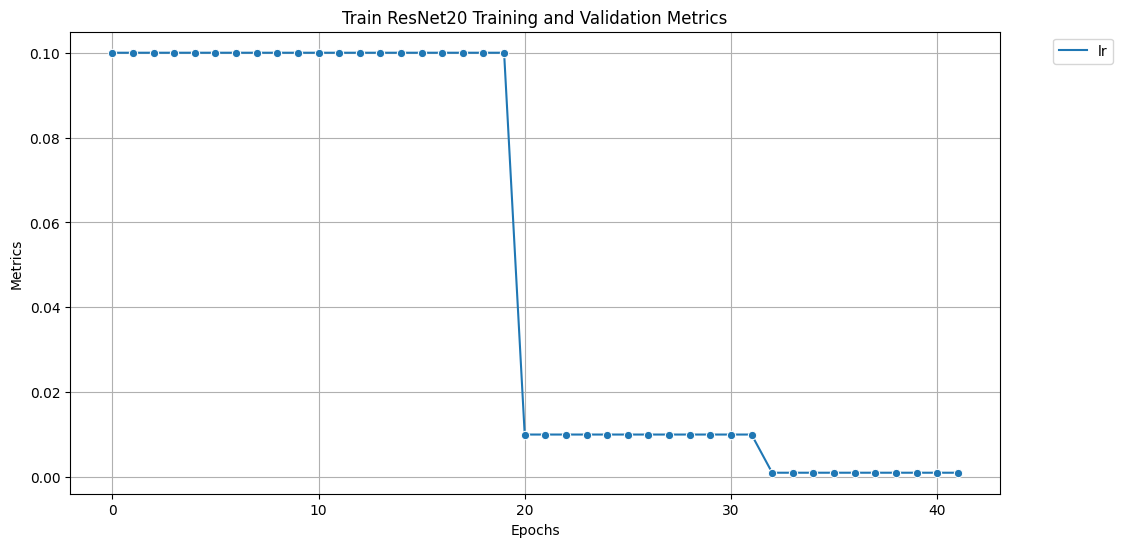

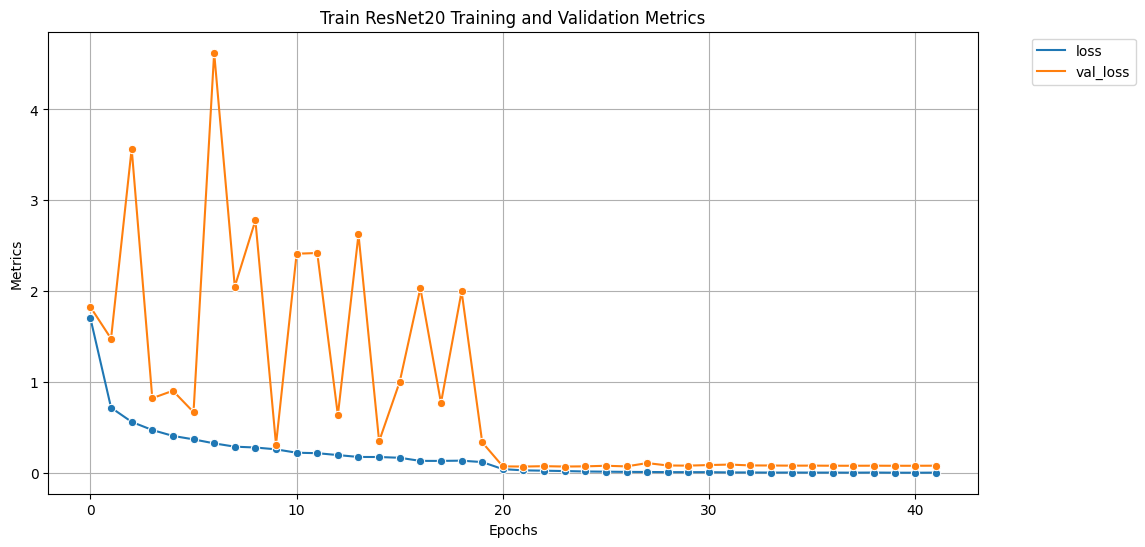

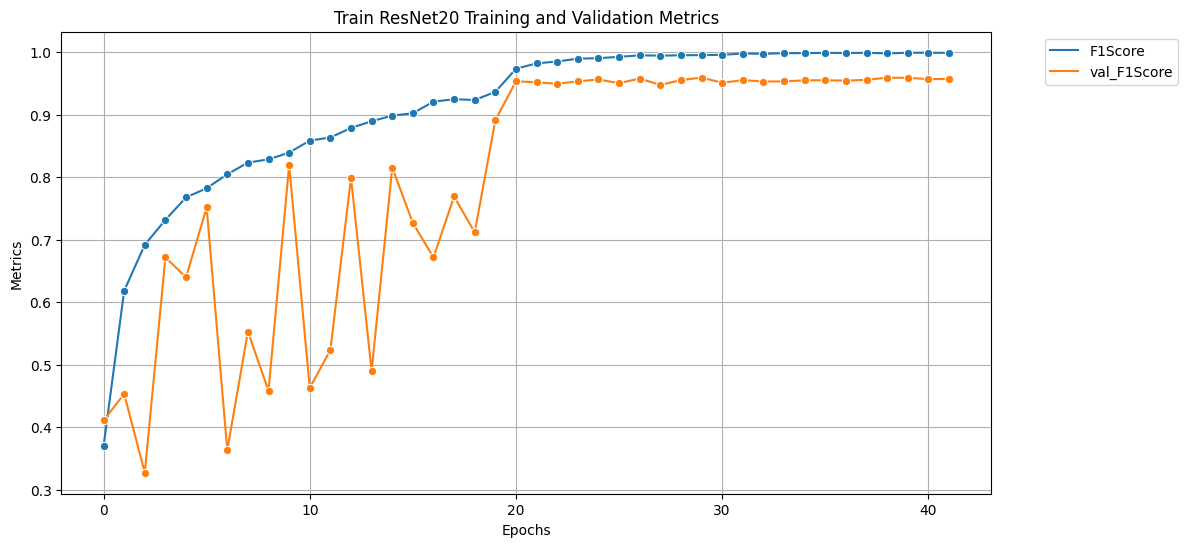

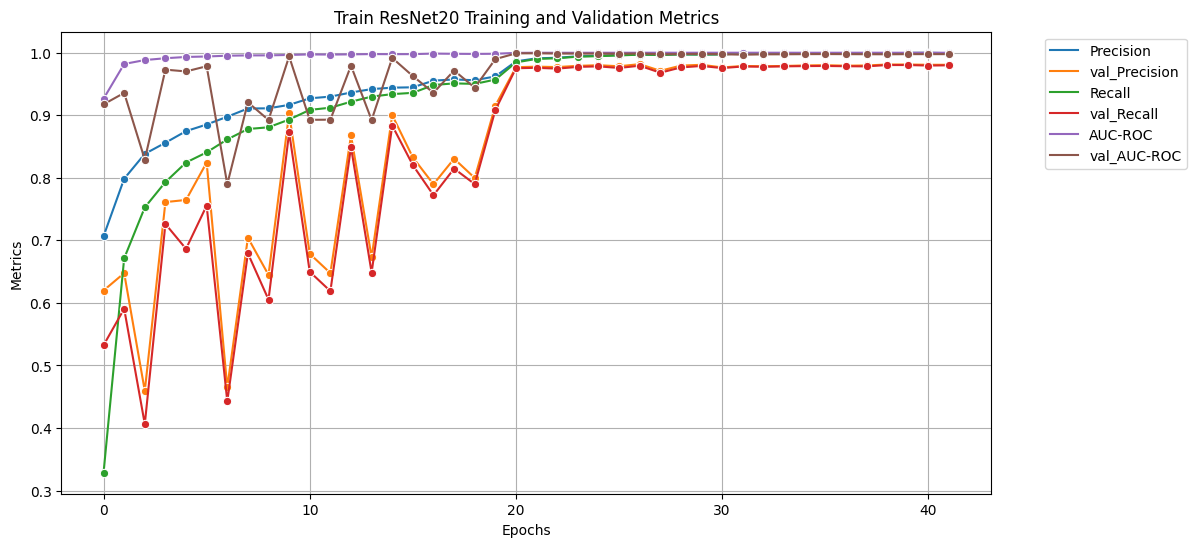

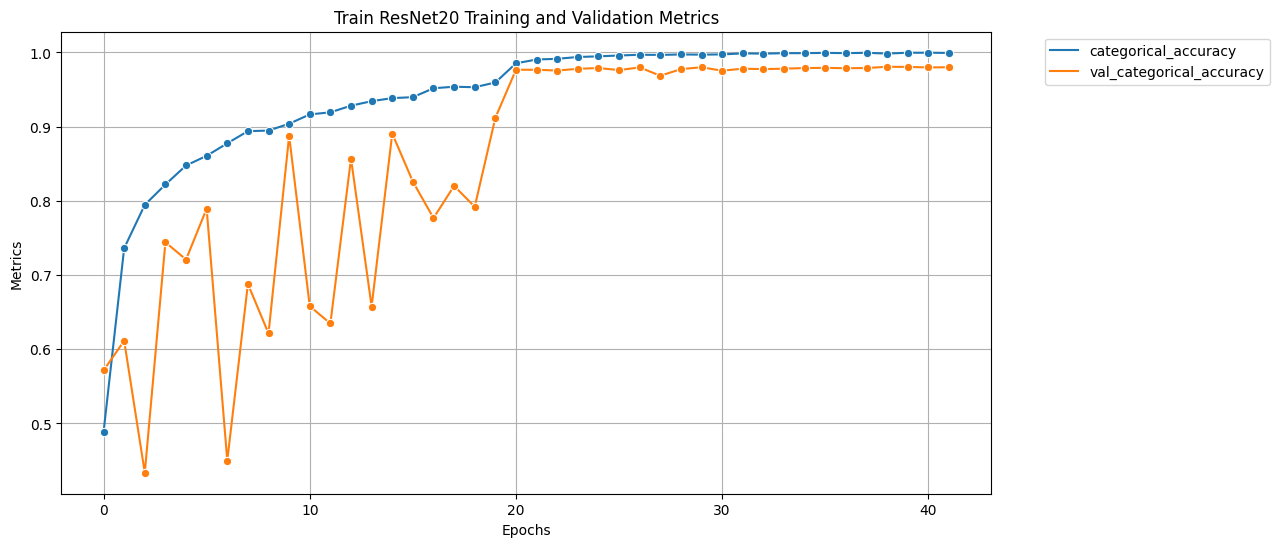

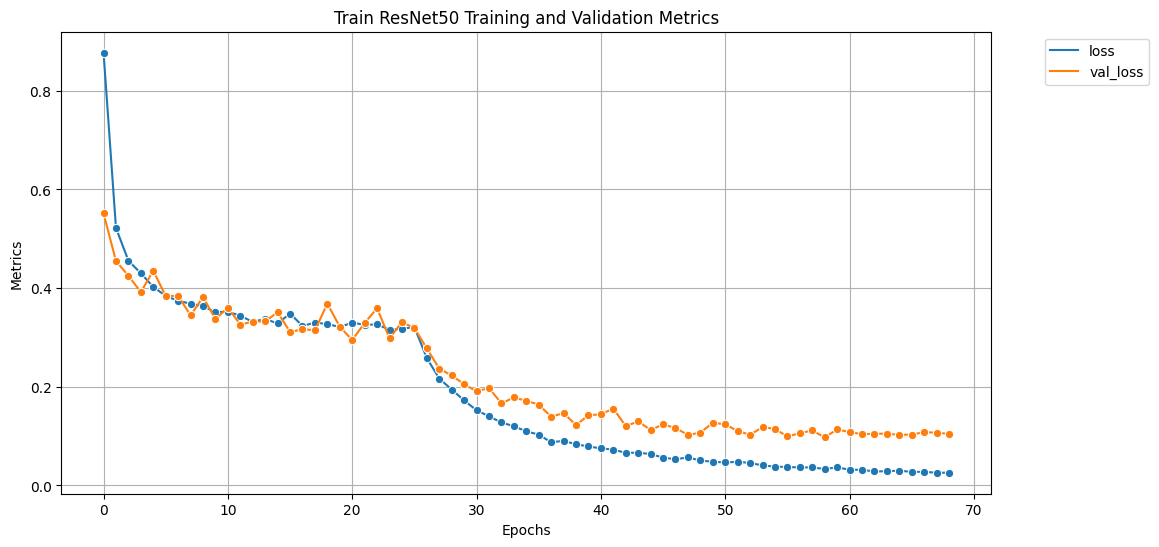

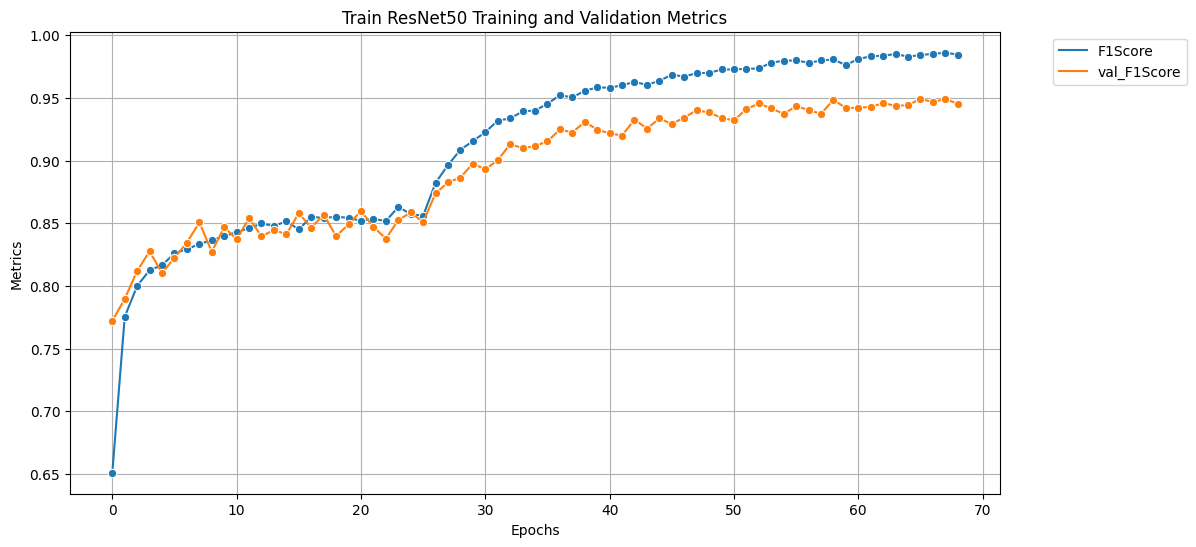

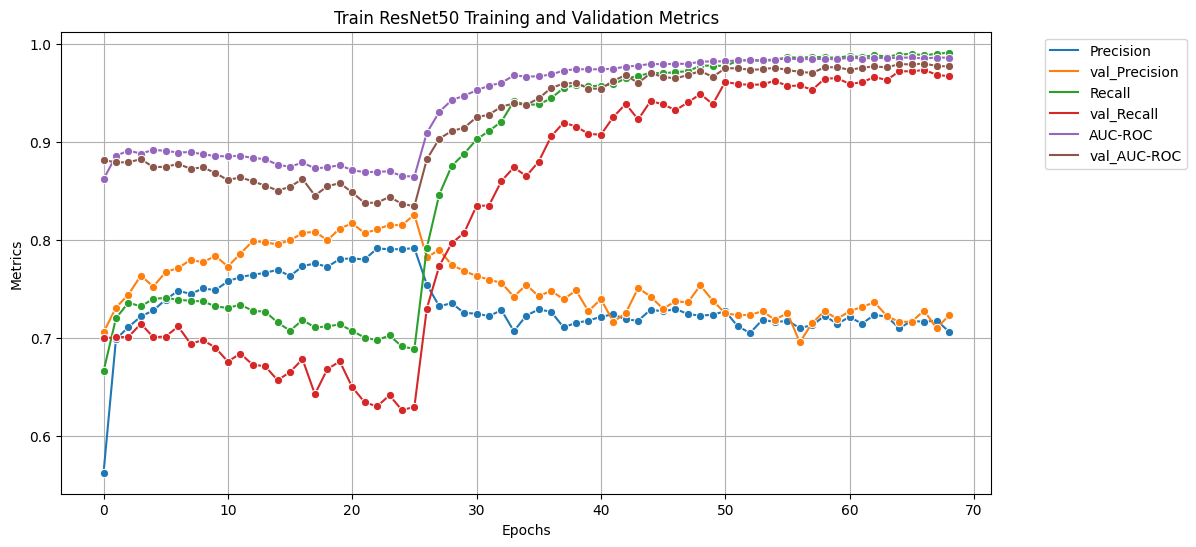

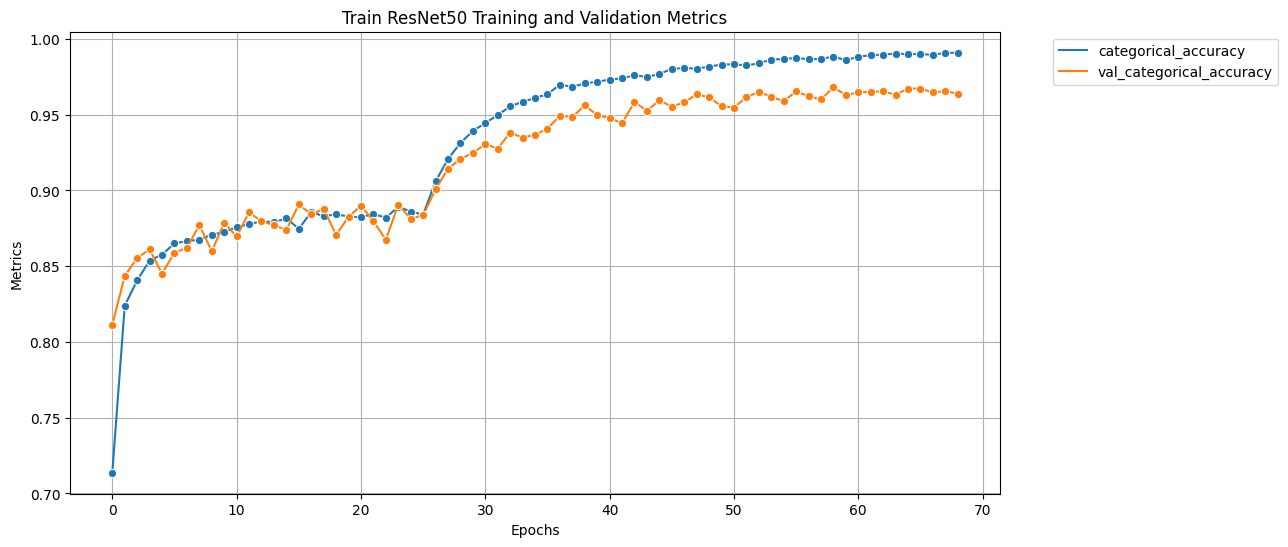

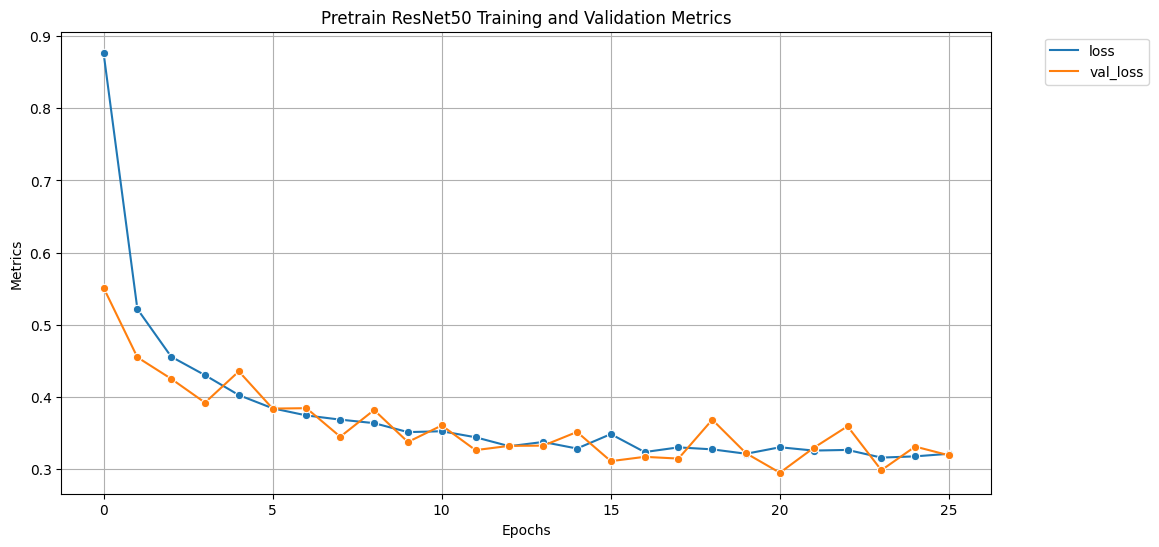

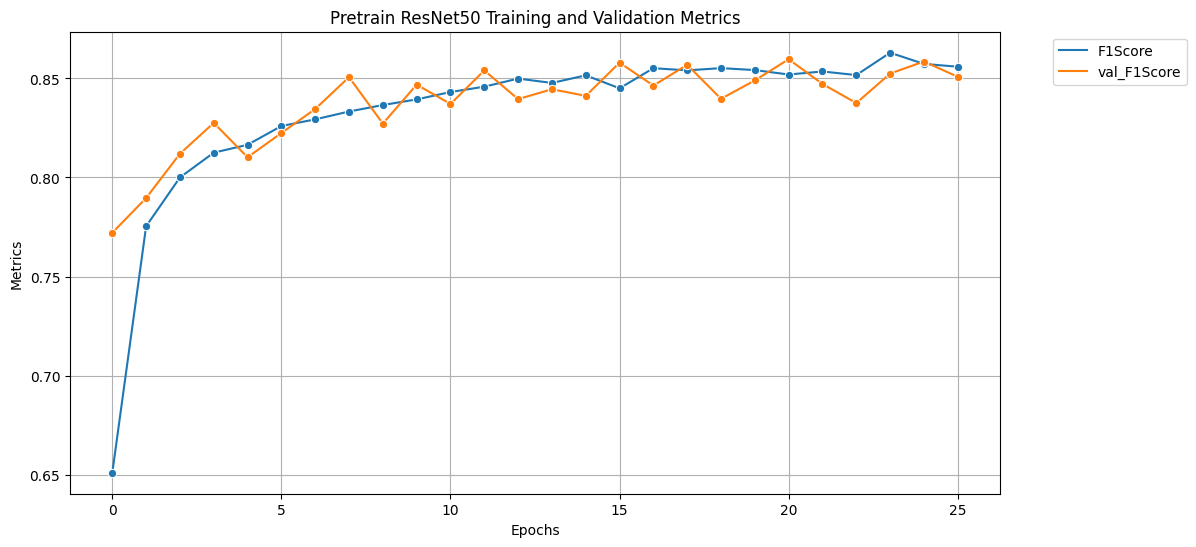

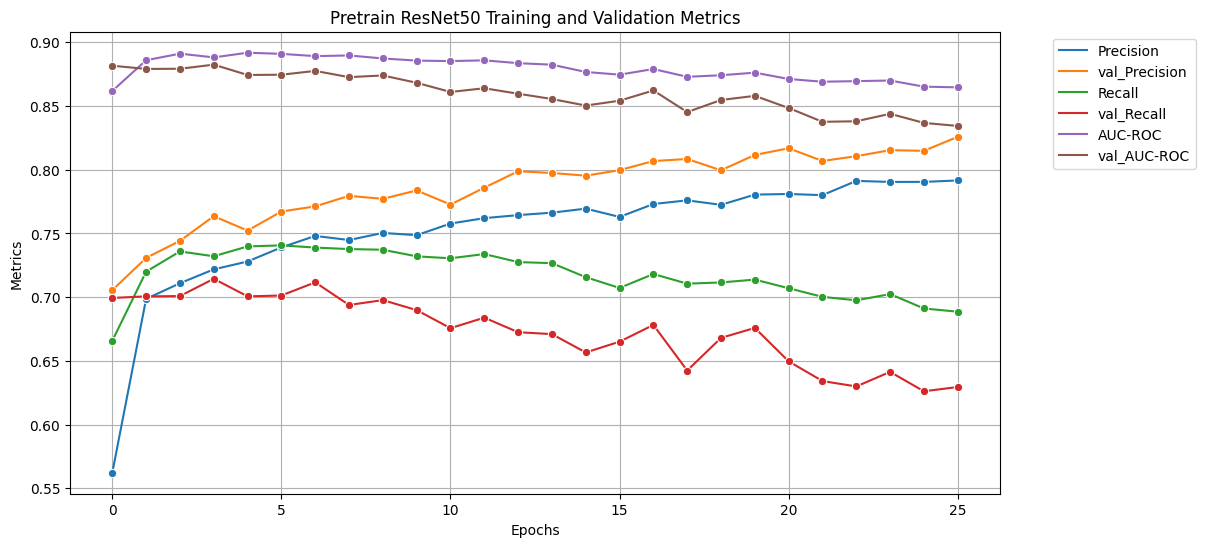

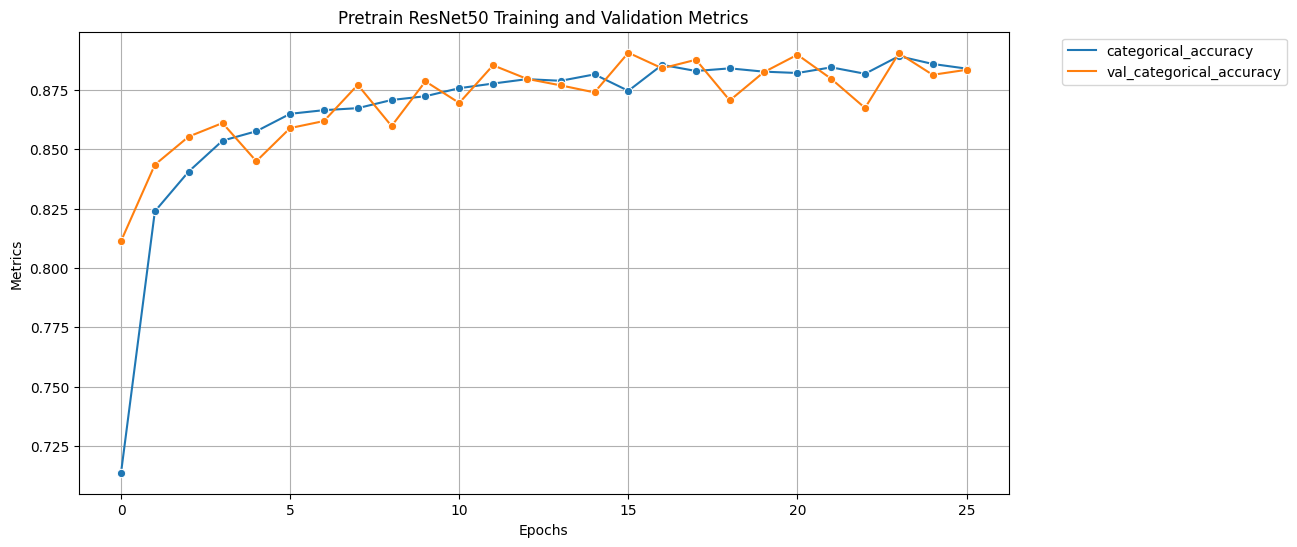

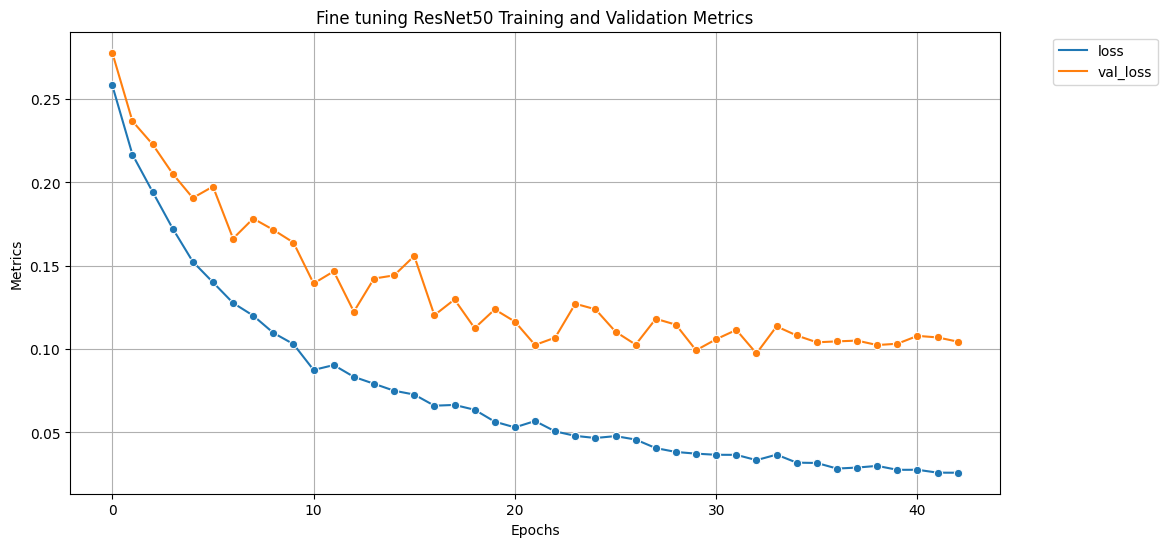

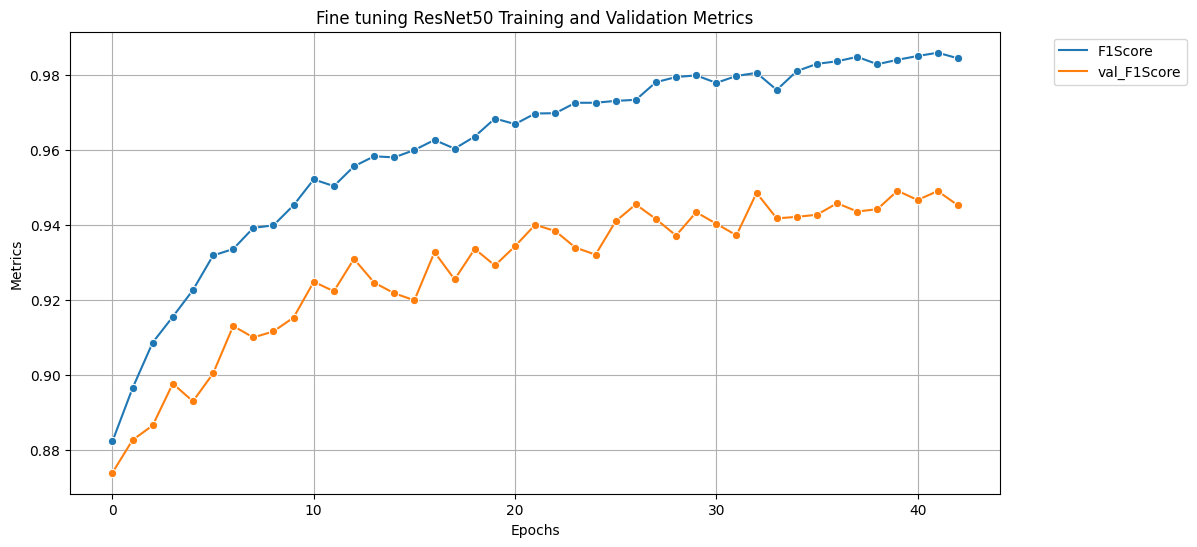

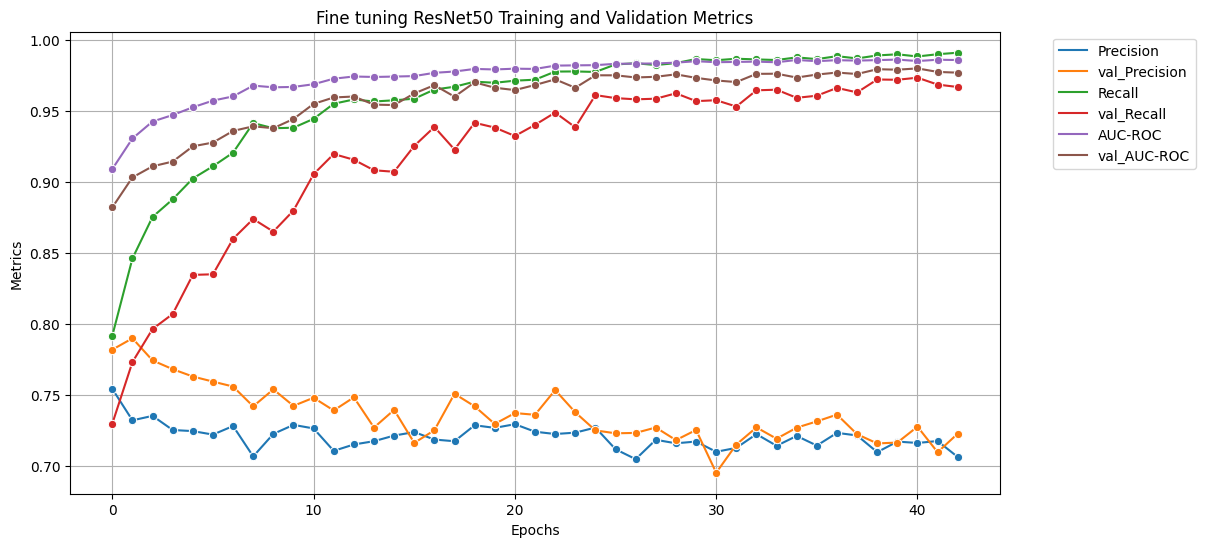

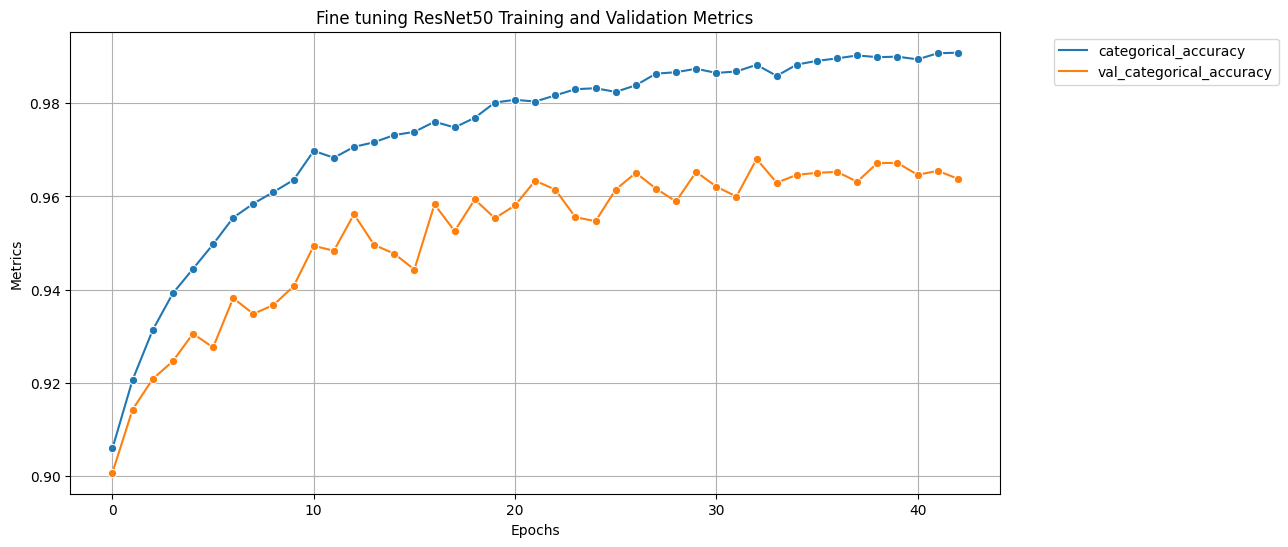

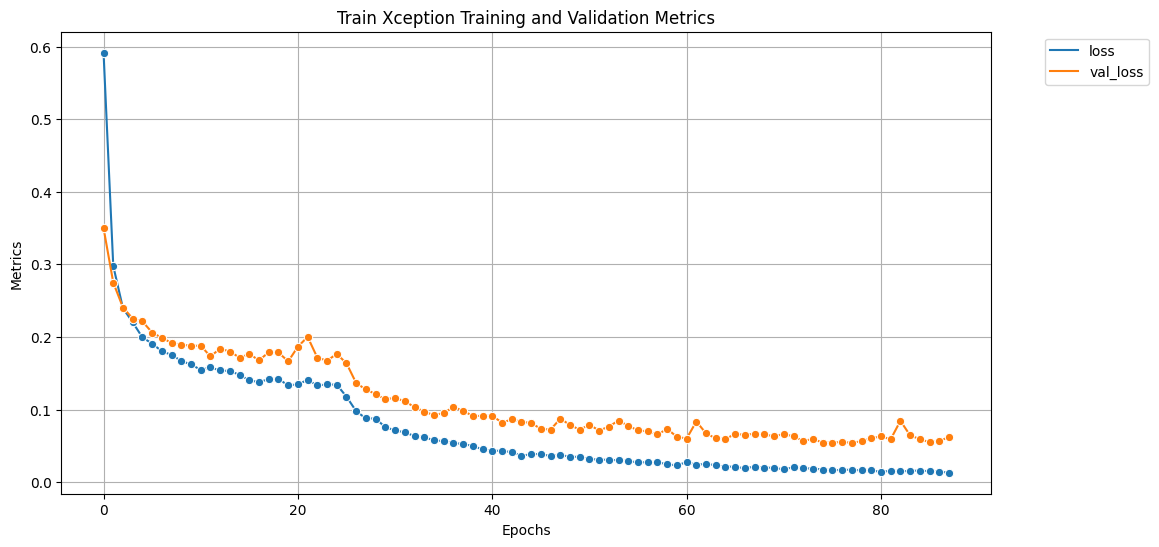

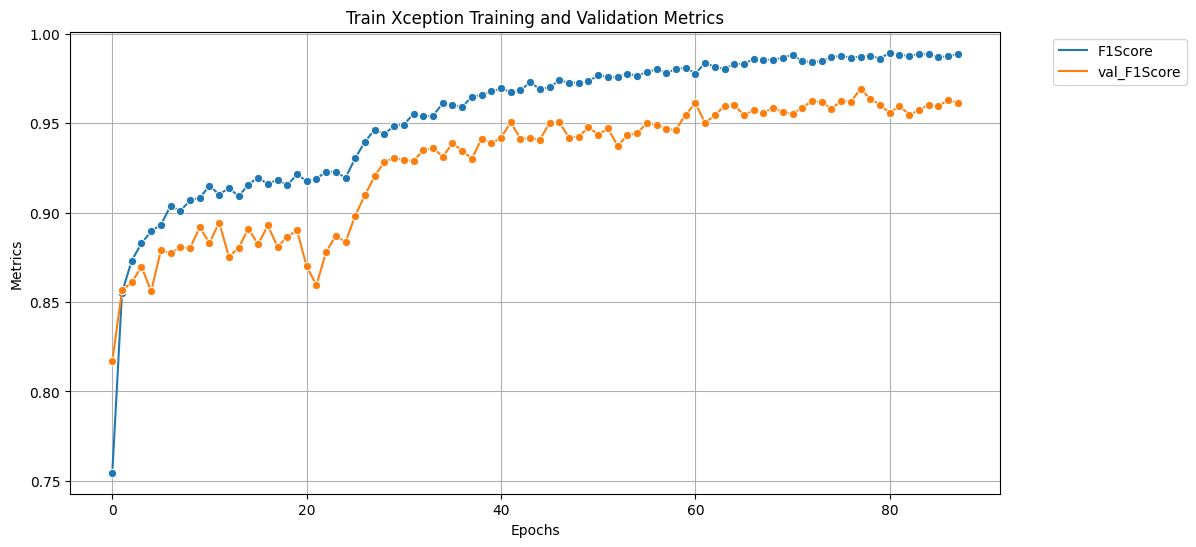

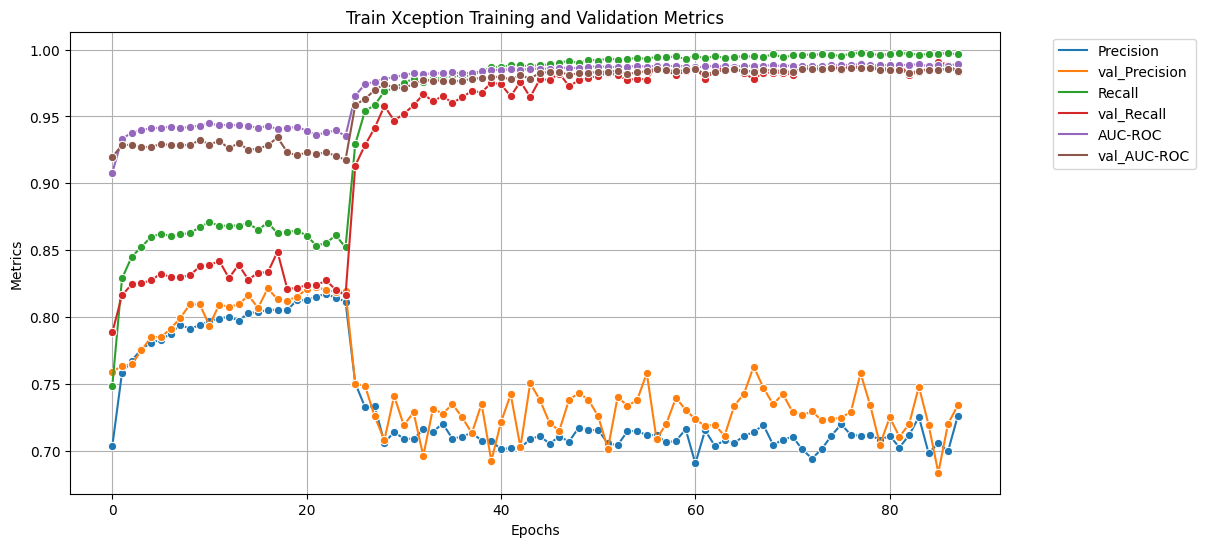

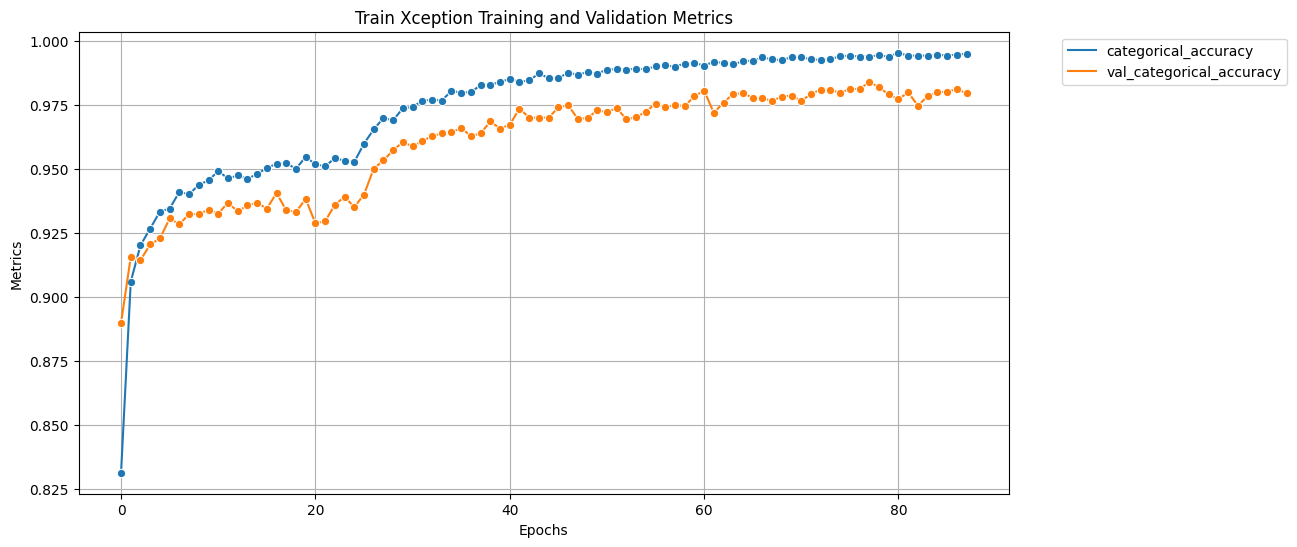

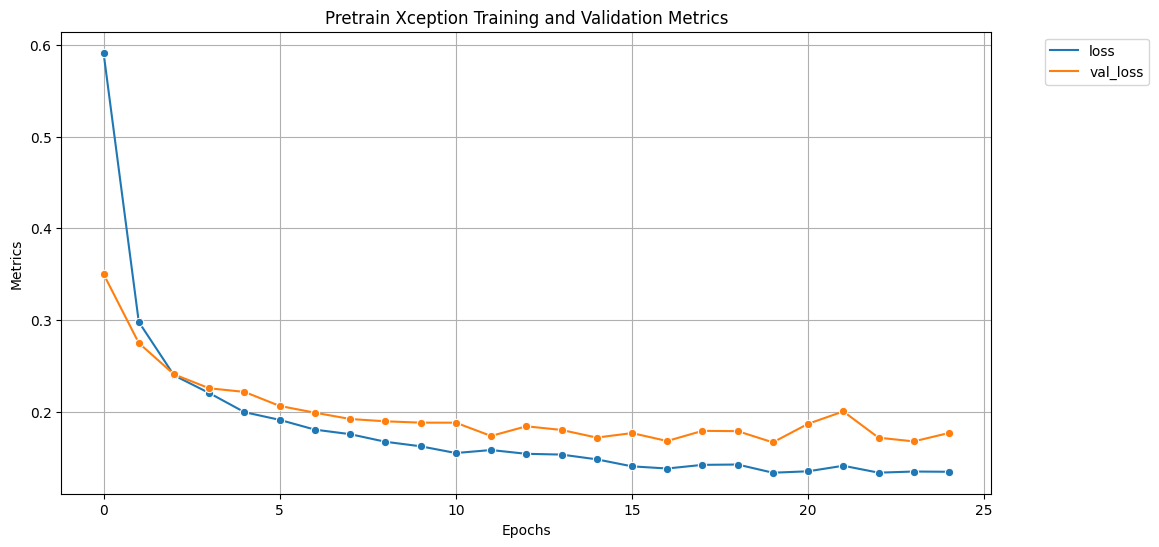

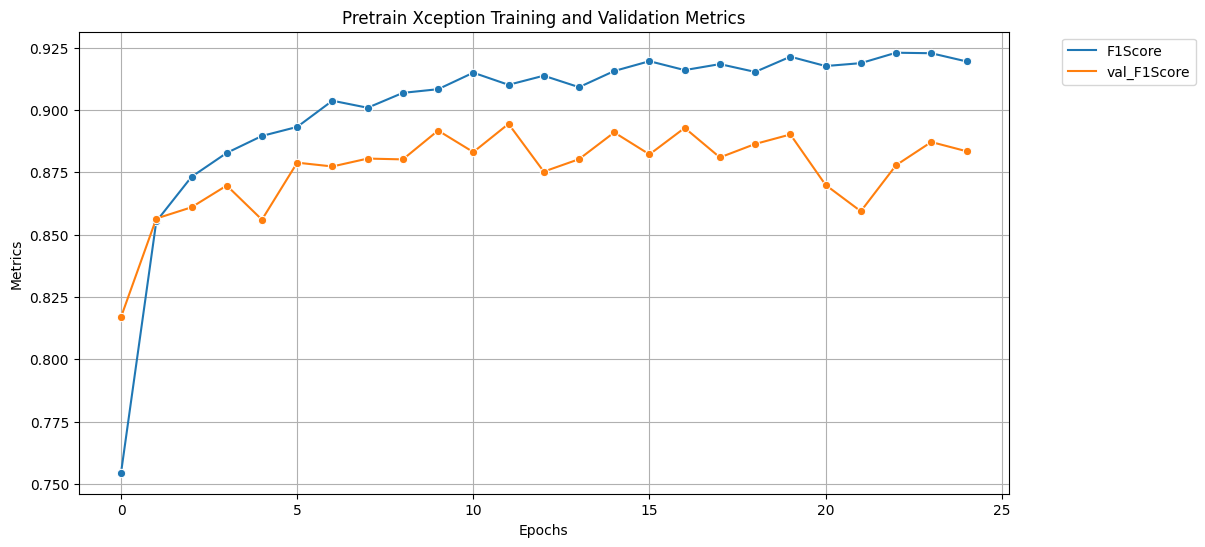

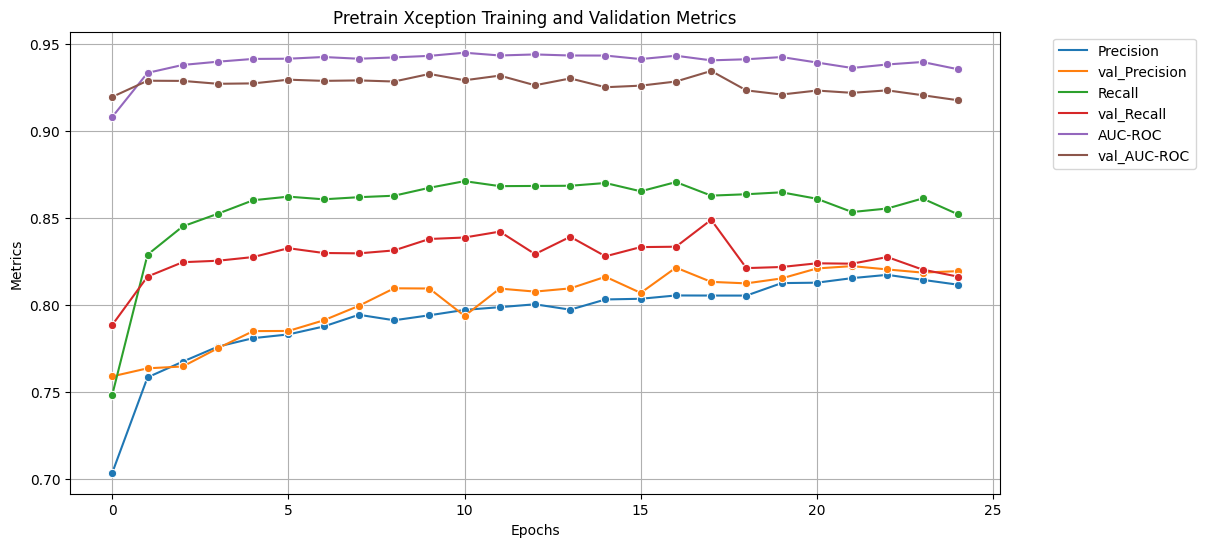

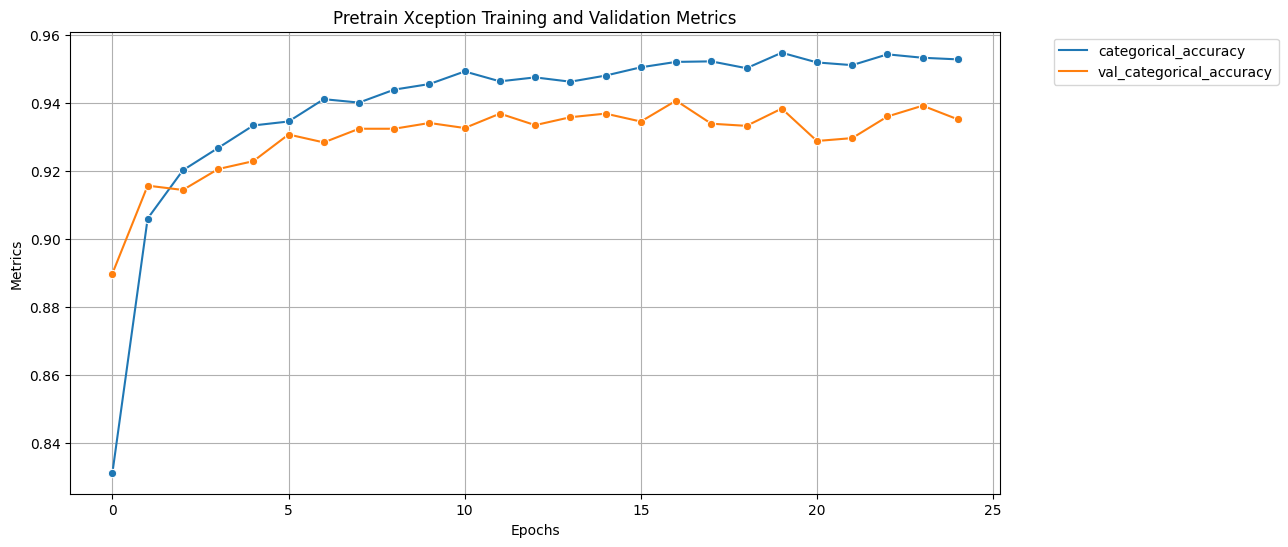

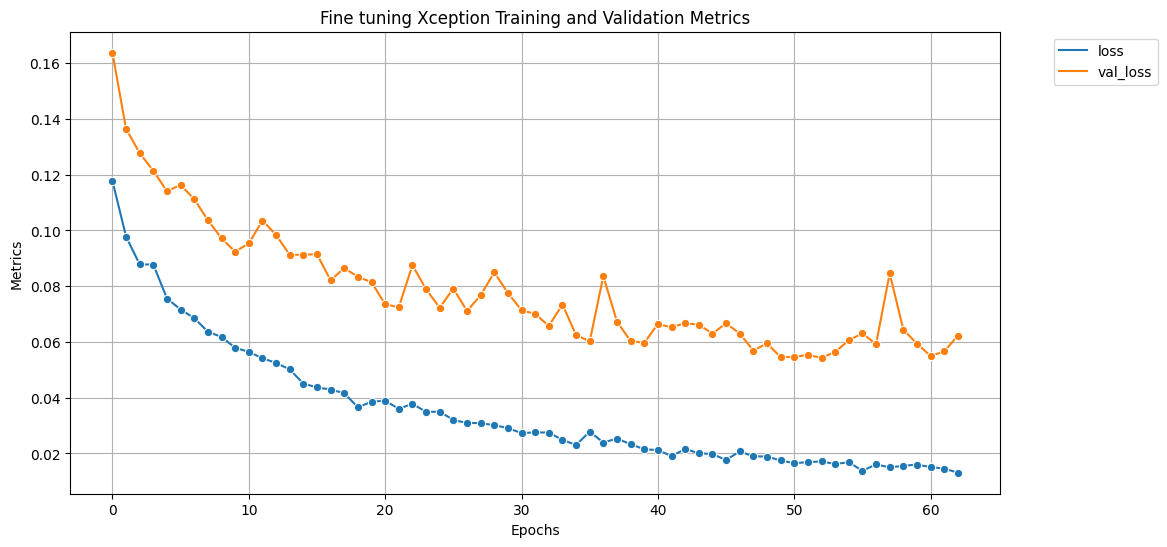

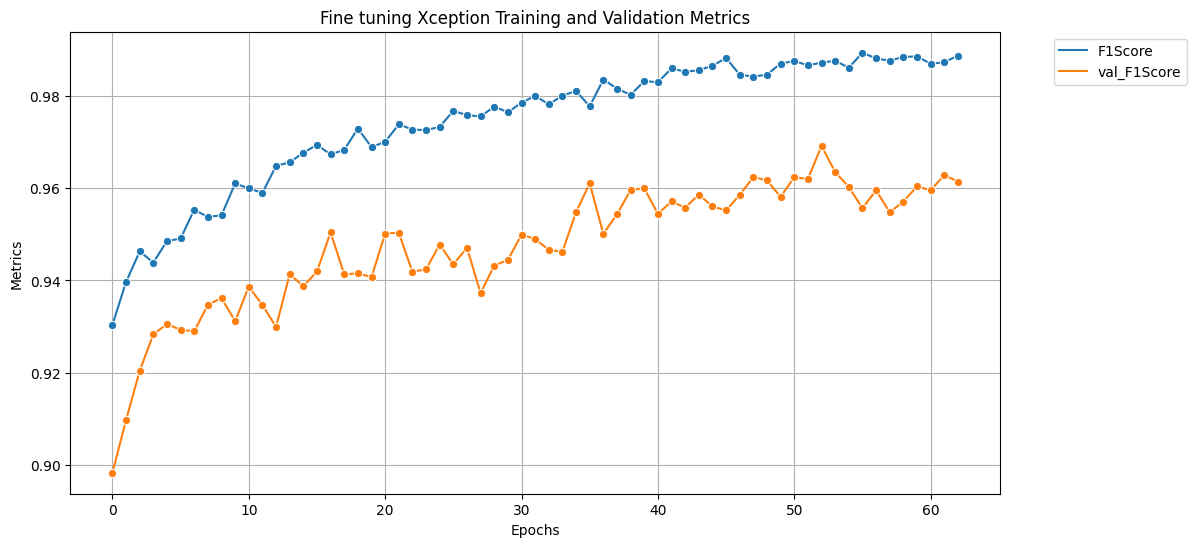

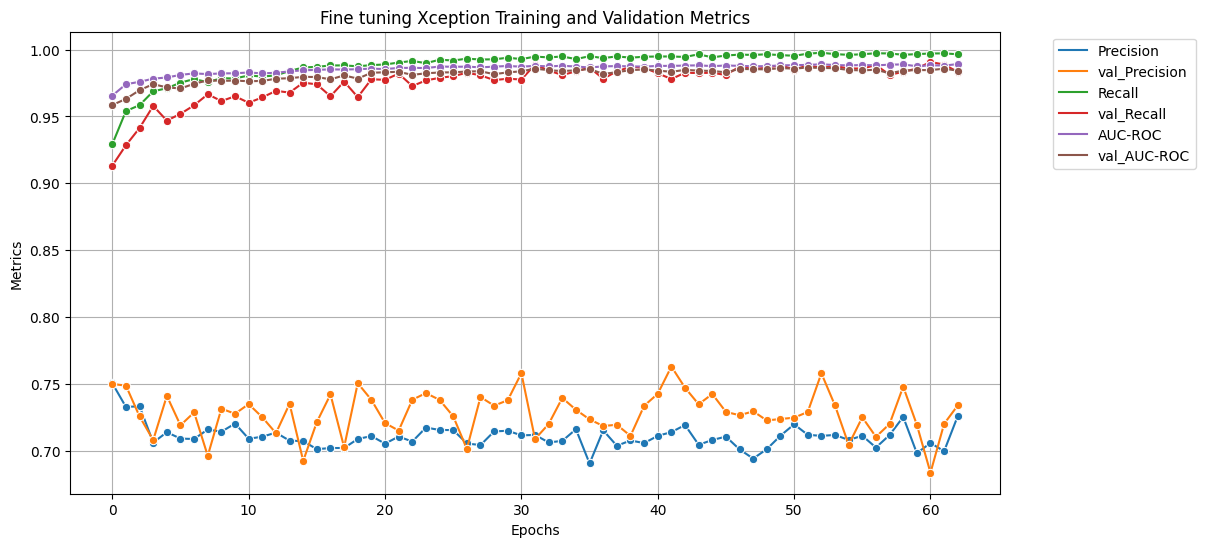

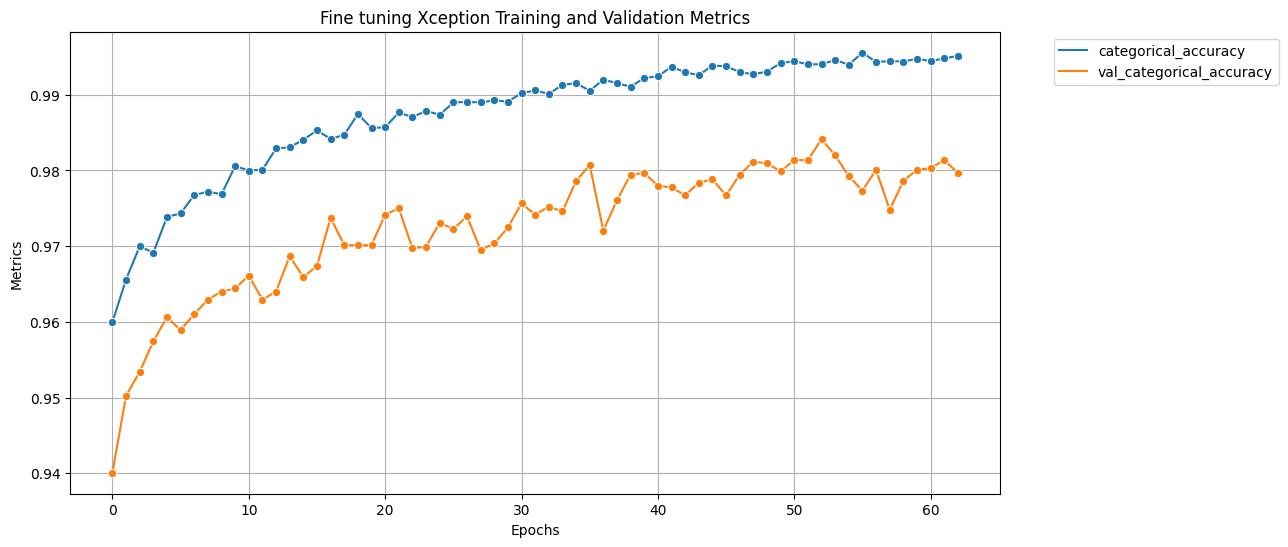

In [18]:
save_model_metric_path = Path("model")

history_resnet_20_path = save_model_metric_path / "resnet20_history.obj"
history_resnet_transfer_path = save_model_metric_path / "resnet_transfer_learning.obj"
history_xception_transfer_path = save_model_metric_path / "xception_transfer_learning.obj"

history_model_20 = pickle.load(history_resnet_20_path.open("rb"))
history_dict_resnet50 = pickle.load(history_resnet_transfer_path.open("rb"))
history_dict_xception = pickle.load(history_xception_transfer_path.open("rb"))

pretrain_resnet50, train_resnet50 = history_dict_resnet50['resnet50_pretrain'], history_dict_resnet50['resnet50_train'] 
pretrain_xception, train_xception = history_dict_xception['xception_pretrain'], history_dict_xception['xception_train'] 

def get_training_plots(history, with_lr = False):
    """
    Return a list of dictionaries to be plotted given `history`

    history: Dictionary containing training information values.
    with_lr: If plot the learning rate curve.
    """
    history = history.copy()
    
    history["Epochs"] = [i for i in range(len(history['loss']))]

    pre_metrics = []
    if with_lr:
        pre_metrics.append({x: history[x] for x in ["Epochs", "lr"]})

    return [
        *pre_metrics,
        {x: history[x] for x in ["Epochs", "loss", "val_loss"]},
        {x: history[x] for x in ["Epochs", "F1Score", "val_F1Score"]},
        {x: history[x] for x in ["Epochs", "Precision", "val_Precision", "Recall", "val_Recall", "AUC-ROC", "val_AUC-ROC"]},
        {x: history[x] for x in ["Epochs", "categorical_accuracy", "val_categorical_accuracy"]},
    ]



full_resnet = {}
for key in pretrain_resnet50:
    full_resnet[key] = pretrain_resnet50[key].copy()
    full_resnet[key].extend(train_resnet50[key])

full_xception = {}
for key in pretrain_resnet50:
    full_xception[key] = pretrain_xception[key].copy()
    full_xception[key].extend(train_xception[key])

for subhistory in get_training_plots(history_model_20, with_lr=True):
    plot_training(subhistory, "Train ResNet20", save_model_metric_path, "_".join(list(subhistory)))
    
for subhistory in get_training_plots(full_resnet):
    plot_training(subhistory, "Train ResNet50", save_model_metric_path, "_".join(list(subhistory)))

for subhistory in get_training_plots(pretrain_resnet50):
    plot_training(subhistory, "Pretrain ResNet50", save_model_metric_path, "_".join(list(subhistory)))
    
for subhistory in get_training_plots(train_resnet50):
    plot_training(subhistory, "Fine tuning ResNet50", save_model_metric_path, "_".join(list(subhistory)))

for subhistory in get_training_plots(full_xception):
    plot_training(subhistory, "Train Xception", save_model_metric_path, "_".join(list(subhistory)))

for subhistory in get_training_plots(pretrain_xception):
    plot_training(subhistory, "Pretrain Xception", save_model_metric_path, "_".join(list(subhistory)))
    
for subhistory in get_training_plots(train_xception):
    plot_training(subhistory, "Fine tuning Xception", save_model_metric_path, "_".join(list(subhistory)))


### Resultados de las curvas de aprendizaje

### ResNet20

En la siguiente curva de aprendizaje se evidencia un comportamiento con errático en el conjunto de validación hasta la época 20, esto se debe probablemente al alto valor en la tasa de aprendizaje que en la época 20 disminuye. Una vez este valor decrece la pérdida en el conjunto de validación se estabiliza y deja de mejorar. El entrenamiento termina en la época 41, lo que implica que el modelo a utilizar es el entrenado en la época 21.

![ResNet20 loss](model/train_resnet20.Epochs_loss_val_loss.png)

Similar a la curva de aprendizaje anterior el accuracy del modelo se estabiliza una vez decrece la tasa de aprendizaje

![ResNet20 acc](model/train_resnet20.Epochs_categorical_accuracy_val_categorical_accuracy.png)

Las curvas de aprendizaje no muestran señales de overfitting a los datos y se considera que el proceso de aprendizaje fue satisfactorio.

### ResNet50V2

La curva de aprendizaje se divide en dos momentos, el de preentrenamiento y el de fine tuning. La transición puede verse claramente cuando la pérdida aumenta su descenso a mitad del proceso. El proceso de entrenamiento se termina en la época 68, indicando que el mejor modelo fue el de la época 58.

![ResNet50 loss](model/train_resnet50.Epochs_loss_val_loss.png)

El cambio de preentrenamiento a fine tuning también se ve reflejado en la curva de accuracy de manera similar.

![ResNet50 acc](model/train_resnet50.Epochs_categorical_accuracy_val_categorical_accuracy.png)

Las curvas de aprendizaje no muestran señales de overfitting. Los valores obtenidos por este modelo son inferiores a los alcanzados por ResNet20.

### Xception

La curva de aprendizaje se divide en dos momentos, el de preentrenamiento y el de fine tuning. Al igual que en ResNet50V2, la transición puede verse claramente cuando la pérdida aumenta su descenso a mitad del proceso. El proceso de entrenamiento se termina en la época 87, indicando que el mejor modelo fue el de la época 77.

![Xception loss](model/train_xception.Epochs_loss_val_loss.png)

El cambio de preentrenamiento a fine tuning también se ve reflejado en la curva de accuracy de manera similar.

![Xception acc](model/train_xception.Epochs_categorical_accuracy_val_categorical_accuracy.png)

Las curvas de aprendizaje no muestran señales de overfitting. Los valores obtenidos por este modelo son inferiores a los alcanzados por ResNet20 pero superiores a ResNet50V2.

## Evaluación del modelo

Se calculan distintas métricas y gráficas en el conjunto de pruebas. Estas permiten decir que tan bien generalizaron los modelos entrenados con respecto al conjunto de pruebas. Las métricas se clasifican en dos conjuntos, métricas multiclase en la clasificación de las frutas y en su estado, y en métricas binarias en la clasificación del estado de la fruta solamente. 

**Clasificación multiclase:**

- Reporte de clasificación
    - F1 (Por clase)
    - F1 Macro
    - F1 Ponderado
    - Precisión (Por clase)
    - Recogrado (Por clase)
    - Accuracy
- Matriz de confusión

**Clasificación binaria (fresco, podrido):**

- Reporte de clasificación
    - F1 (Por clase)
    - F1 Macro
    - F1 Ponderado
    - Precisión (Por clase)
    - Recogrado (Por clase)
    - Accuracy
- Matriz de confusión
- AUC-ROC
- Gráfica de curva ROC

In [6]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, roc_curve

def evaluate_model(model, test_ds):
    pred_result = model.predict(test_ds)
    eval_result = model.evaluate(test_ds, return_dict=True)
    return pred_result, eval_result

def convert_predicitons_to_labels(predictions, class_names):
    indexes = tf.argmax(predictions, axis=-1)
    return [class_names[i] for i in indexes], indexes

def print_report(true_labels, inferred_labels, class_names, true_labels_indexes, pred_label_scores, header, save_path):
    cm = confusion_matrix(true_labels, inferred_labels, labels=class_names)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_names,
                yticklabels=class_names)
    plt.xlabel('Inferred Labels')
    plt.ylabel('True Labels')
    plt.title(f'{header} Confusion Matrix')
    if true_labels_indexes and pred_label_scores:
        plt.savefig(save_path / "binary_confusion_matrix.png", bbox_inches='tight')
    else:
        plt.savefig(save_path / "all_classes_confusion_matrix.png", bbox_inches='tight')
    plt.show()

    report = classification_report(true_labels, inferred_labels, digits=3, zero_division=0)
    print(report)
    report_dict = classification_report(true_labels, inferred_labels, zero_division=0, output_dict=True)

    acc = accuracy_score(true_labels, inferred_labels)
    f1 = f1_score(true_labels, inferred_labels, zero_division=0, average='macro')
    recall = recall_score(true_labels, inferred_labels, zero_division=0, average='macro')
    precision = precision_score(true_labels, inferred_labels, zero_division=0, average='macro')
    if true_labels_indexes and pred_label_scores:
        auc = roc_auc_score(true_labels_indexes, pred_label_scores, multi_class='ovr')
    else:
        auc = -1

    # Define the metrics and their corresponding values
    colors = ['blue', 'green', 'purple', 'orange']
    metrics = ['F1-score', 'Recall', 'Precision', 'Accuracy']
    values = [f1, recall, precision, acc]
    if true_labels_indexes and pred_label_scores:
        colors.append('red')
        metrics.append('ROC-AUC')
        values.append(auc)
        print_roc(true_labels, pred_label_scores, class_names, "fresh", header, auc, save_path)


    # Plot the bar graph
    plt.figure(figsize=(8, 6))
    bars = plt.bar(metrics, values, color=colors)

    # Add numeric values on top of each bar
    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.3f}', ha='center', va='bottom')

    plt.ylim(0, 1.1)
    plt.ylabel('Value')
    plt.title(f'{header} Performance Metrics')
    if true_labels_indexes and pred_label_scores:
        plt.savefig(save_path / "binary_performance_metrics.png", bbox_inches='tight')
    else:
        plt.savefig(save_path / "all_classes_performance_metrics.png", bbox_inches='tight')
    plt.show()

    return {
        "confusion_matrix": cm,
        "classification_report": report_dict,
        "auc_roc": auc,
        "f1": f1,
        "accuracy": acc,
        "recall": recall,
        "precision": precision
    }

def print_roc(true_labels, pred_label_scores, class_names, true_label, header, roc_auc, save_path):
    index = class_names.index(true_label)
    pred_label_scores = [x[index] for x in pred_label_scores]
    fpr, tpr, thresholds = roc_curve(true_labels, pred_label_scores, pos_label=true_label)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{header} Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.savefig(save_path / "roc.png")
    plt.show()

def reduce_prob(value, rotten_indexes):
    rotten_prob = 0
    fresh_prob = 0
    for i, val in enumerate(value):
        if i in rotten_indexes:
            rotten_prob += val
        else:
            fresh_prob += val
    return [rotten_prob, fresh_prob]

def create_test_report(model, test_ds, class_names, header, save_path):
    save_path.mkdir(exist_ok=True)
    
    pred_result, eval_result = evaluate_model(model, test_ds)
    
    inferred_labels, infered_indexes = convert_predicitons_to_labels(pred_result, class_names)
    true_labels_indexes = list(test_ds.unbatch().map(lambda x,y: tf.argmax(y)))
    true_labels_indexes = [x.numpy() for x in true_labels_indexes]
    true_labels = [class_names[x] for x in true_labels_indexes]

    metrics = print_report(true_labels, inferred_labels, class_names, None, None, f"{header} All Classes", save_path)
    
    rotten_indexes = [i for i, label in enumerate(class_names) if label.startswith("rotten")]

    binary_inferred_labels = ["rotten" if label.startswith("rotten") else "fresh" for label in inferred_labels]
    binary_true_labels = ["rotten" if label.startswith("rotten") else "fresh" for label in true_labels]
    binary_true_labels_indexes = [[1, 0] if label.startswith("rotten") else [0, 1] for label in true_labels] 
    binary_pred_result = [reduce_prob(value, rotten_indexes) for value in pred_result]
    
    binary_metrics = print_report(binary_true_labels, binary_inferred_labels, ["rotten", "fresh"], binary_true_labels_indexes, binary_pred_result, f"{header} Fresh Classes", save_path)
    
    with (save_path / "metrics.obj").open("wb") as file:
        pickle.dump({
            "all_classes_metrics": metrics,
            "binary_metrics": binary_metrics,
        }, file)
    

### Cargar modelos entrenados

Los modelos se cargan con los pesos guardados. Estos pesos son los que tenía el modelo cuando alcanzó el valor de pérdida más bajo durante el entrenamiento. Lo que indica que a partir de este punto el modelo no mejoró su capacidad de generalización.

In [7]:
checkpoint_resnet_20_path = Path("model", "resnet20")
resnet_transfer_path = Path("model", "resnet_transfer_learning")
xception_transfer_path = Path("model", "xception_transfer_learning")

model_20 = tf.keras.models.load_model(str(checkpoint_resnet_20_path))
resnet50_model = tf.keras.models.load_model(str(resnet_transfer_path))
xception_model = tf.keras.models.load_model(str(xception_transfer_path))

211/211 [==============================] - 11s 48ms/step - loss: 0.0503 - categorical_accuracy: 0.9826 - F1Score: 0.7584 - Precision: 0.9834 - Recall: 0.9820 - AUC-ROC: 0.9995


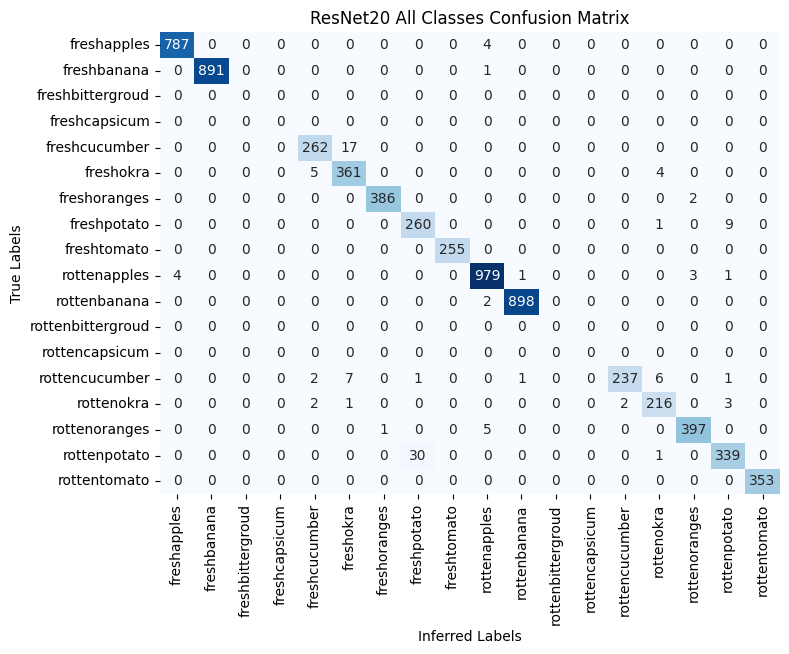

                precision    recall  f1-score   support

   freshapples      0.995     0.995     0.995       791
   freshbanana      1.000     0.999     0.999       892
 freshcucumber      0.967     0.939     0.953       279
     freshokra      0.935     0.976     0.955       370
  freshoranges      0.997     0.995     0.996       388
   freshpotato      0.893     0.963     0.927       270
   freshtomato      1.000     1.000     1.000       255
  rottenapples      0.988     0.991     0.989       988
  rottenbanana      0.998     0.998     0.998       900
rottencucumber      0.992     0.929     0.960       255
    rottenokra      0.947     0.964     0.956       224
 rottenoranges      0.988     0.985     0.986       403
  rottenpotato      0.960     0.916     0.938       370
  rottentomato      1.000     1.000     1.000       353

      accuracy                          0.983      6738
     macro avg      0.976     0.975     0.975      6738
  weighted avg      0.983     0.983     0.983 

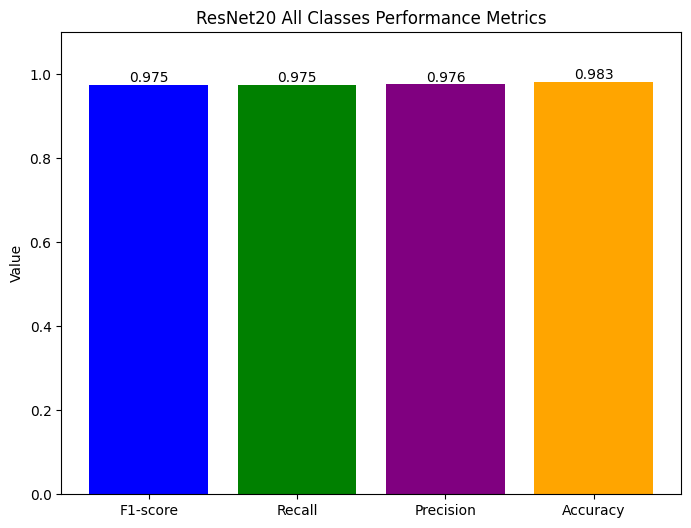

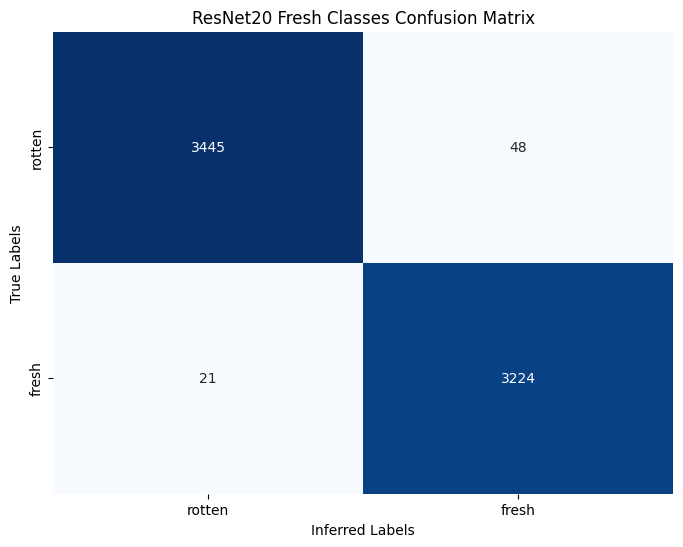

              precision    recall  f1-score   support

       fresh      0.985     0.994     0.989      3245
      rotten      0.994     0.986     0.990      3493

    accuracy                          0.990      6738
   macro avg      0.990     0.990     0.990      6738
weighted avg      0.990     0.990     0.990      6738



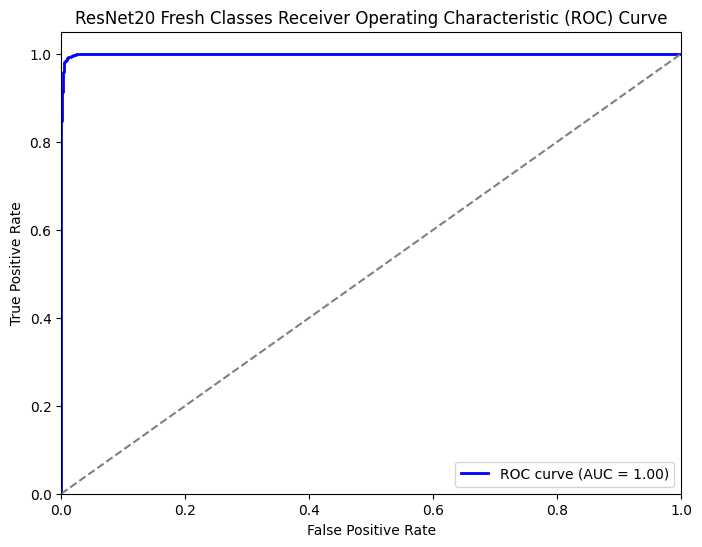

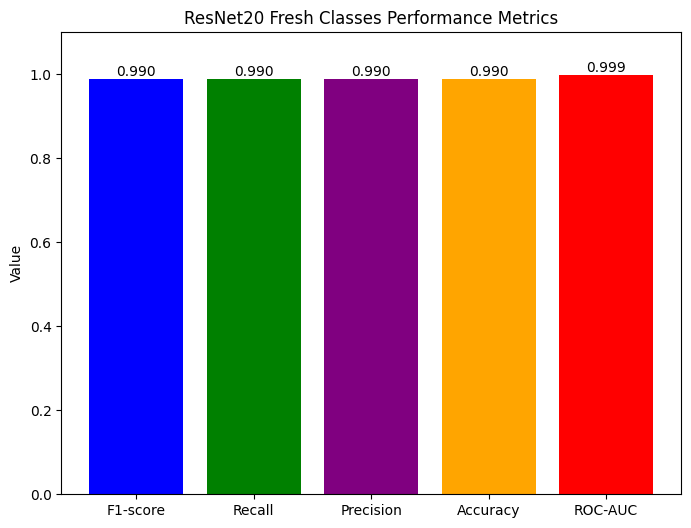

211/211 [==============================] - 27s 119ms/step - loss: 0.0999 - categorical_accuracy: 0.9647 - F1Score: 0.7398 - Precision: 0.6665 - Recall: 0.9709 - AUC-ROC: 0.9755


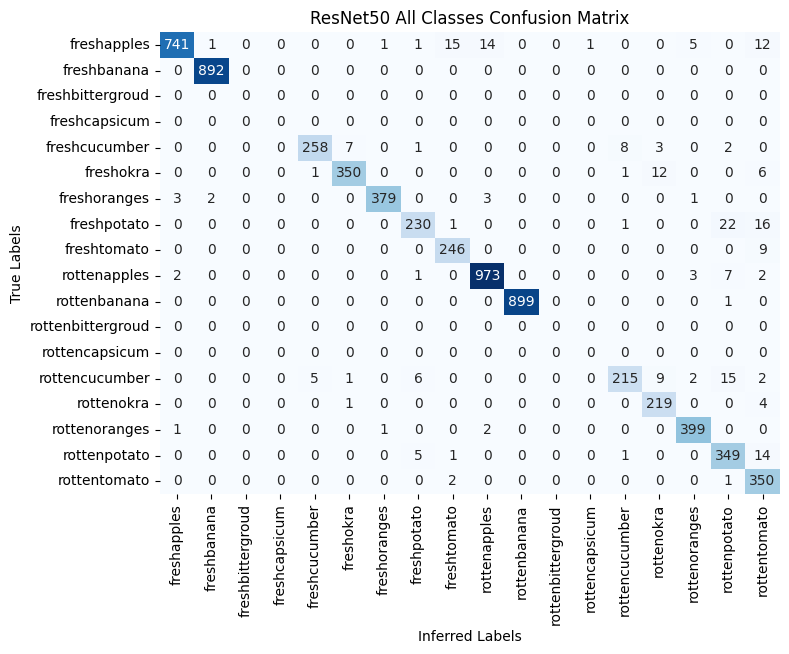

                precision    recall  f1-score   support

   freshapples      0.992     0.937     0.964       791
   freshbanana      0.997     1.000     0.998       892
 freshcucumber      0.977     0.925     0.950       279
     freshokra      0.975     0.946     0.960       370
  freshoranges      0.995     0.977     0.986       388
   freshpotato      0.943     0.852     0.895       270
   freshtomato      0.928     0.965     0.946       255
  rottenapples      0.981     0.985     0.983       988
  rottenbanana      1.000     0.999     0.999       900
rottencapsicum      0.000     0.000     0.000         0
rottencucumber      0.951     0.843     0.894       255
    rottenokra      0.901     0.978     0.938       224
 rottenoranges      0.973     0.990     0.982       403
  rottenpotato      0.879     0.943     0.910       370
  rottentomato      0.843     0.992     0.911       353

      accuracy                          0.965      6738
     macro avg      0.889     0.889     0.888 

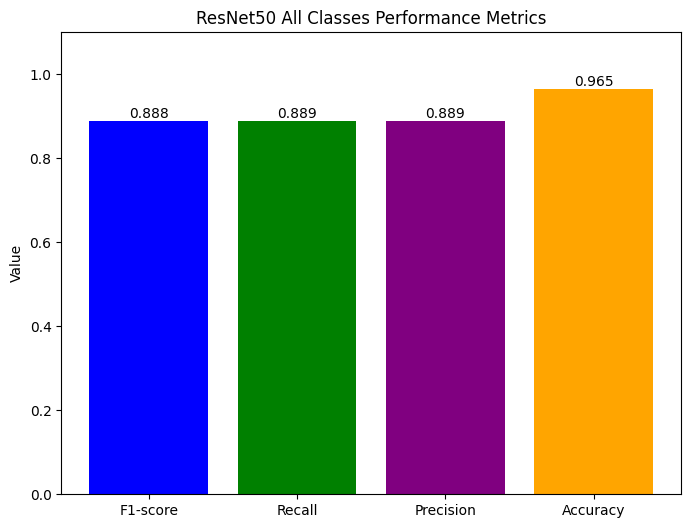

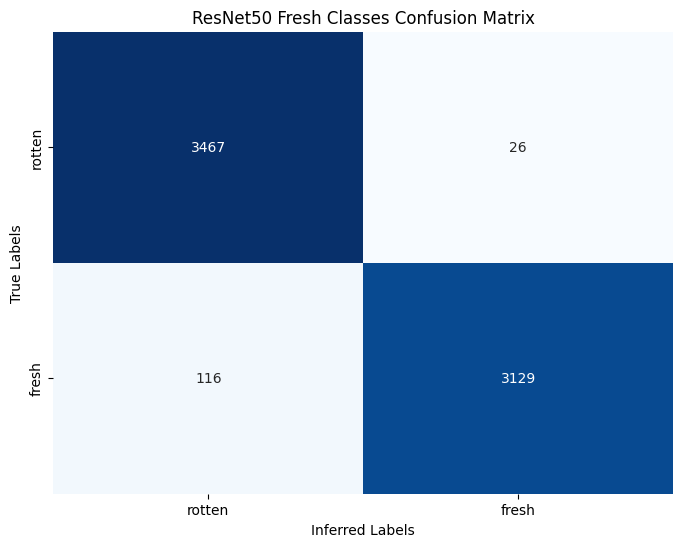

              precision    recall  f1-score   support

       fresh      0.992     0.964     0.978      3245
      rotten      0.968     0.993     0.980      3493

    accuracy                          0.979      6738
   macro avg      0.980     0.978     0.979      6738
weighted avg      0.979     0.979     0.979      6738



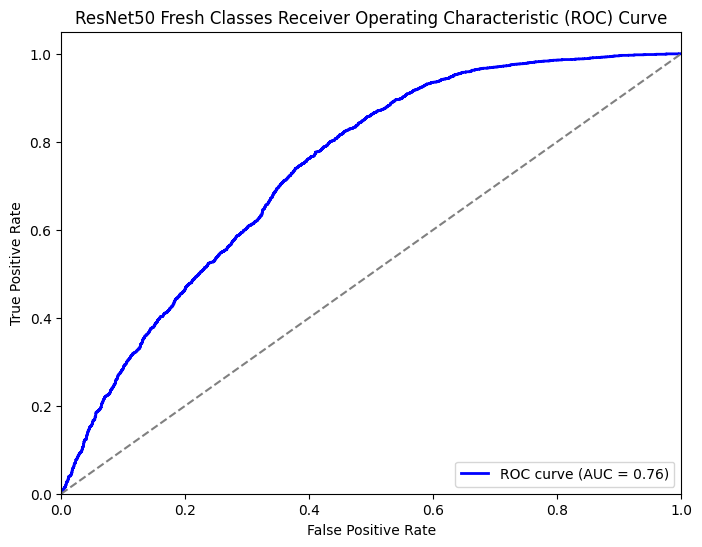

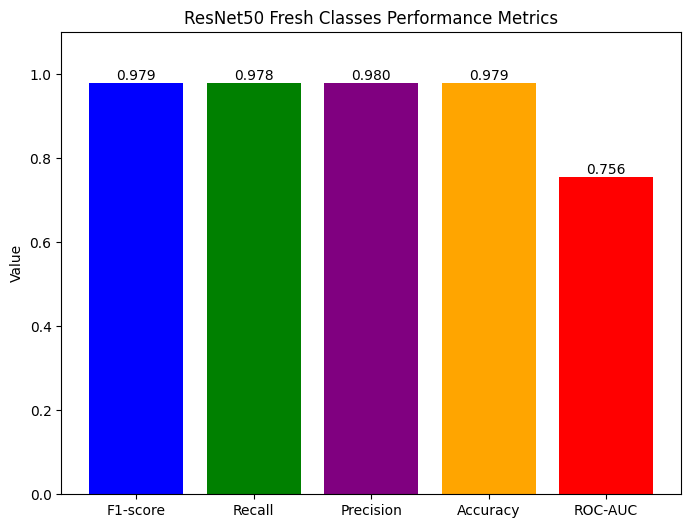

211/211 [==============================] - 31s 142ms/step - loss: 0.0557 - categorical_accuracy: 0.9831 - F1Score: 0.7568 - Precision: 0.7255 - Recall: 0.9878 - AUC-ROC: 0.9860


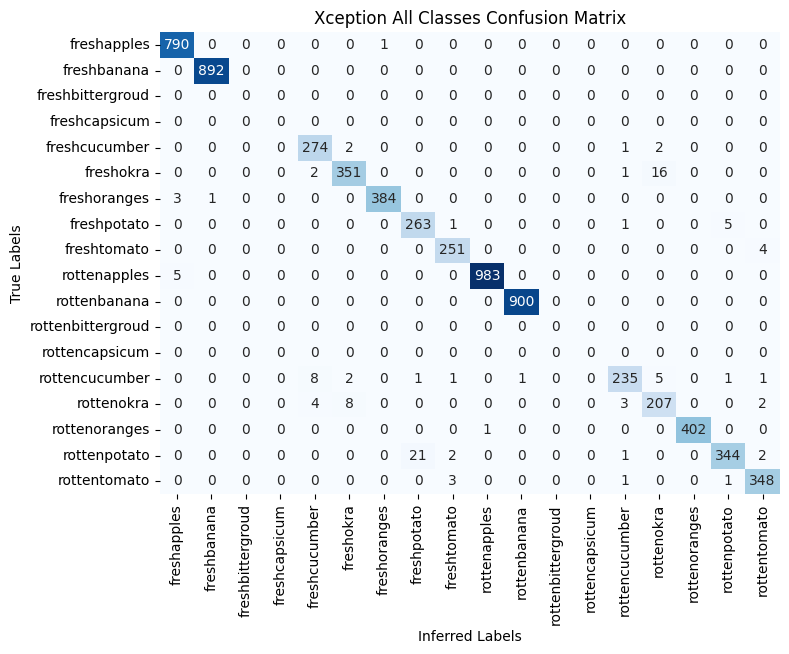

                precision    recall  f1-score   support

   freshapples      0.990     0.999     0.994       791
   freshbanana      0.999     1.000     0.999       892
 freshcucumber      0.951     0.982     0.966       279
     freshokra      0.967     0.949     0.958       370
  freshoranges      0.997     0.990     0.994       388
   freshpotato      0.923     0.974     0.948       270
   freshtomato      0.973     0.984     0.979       255
  rottenapples      0.999     0.995     0.997       988
  rottenbanana      0.999     1.000     0.999       900
rottencucumber      0.967     0.922     0.944       255
    rottenokra      0.900     0.924     0.912       224
 rottenoranges      1.000     0.998     0.999       403
  rottenpotato      0.980     0.930     0.954       370
  rottentomato      0.975     0.986     0.980       353

      accuracy                          0.983      6738
     macro avg      0.973     0.974     0.973      6738
  weighted avg      0.983     0.983     0.983 

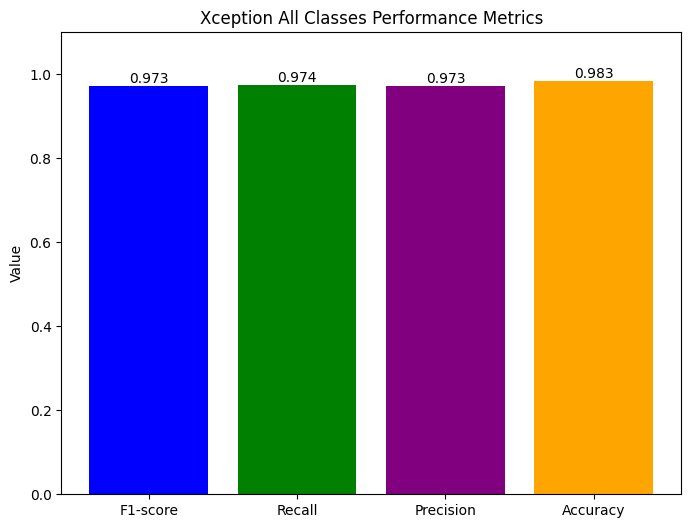

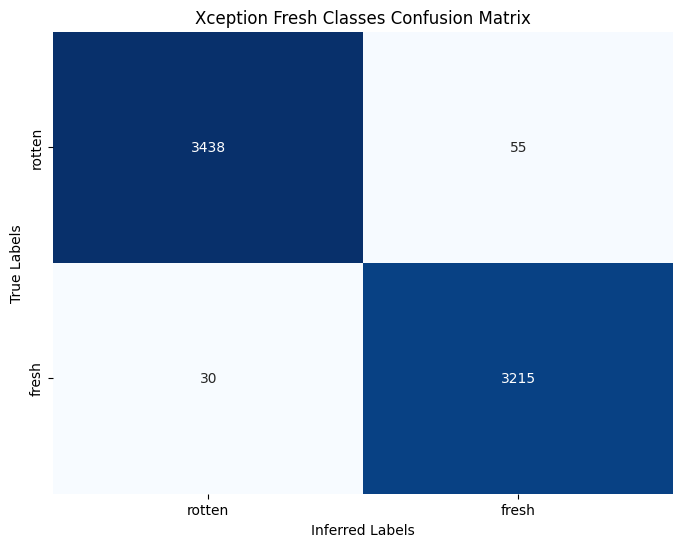

              precision    recall  f1-score   support

       fresh      0.983     0.991     0.987      3245
      rotten      0.991     0.984     0.988      3493

    accuracy                          0.987      6738
   macro avg      0.987     0.988     0.987      6738
weighted avg      0.987     0.987     0.987      6738



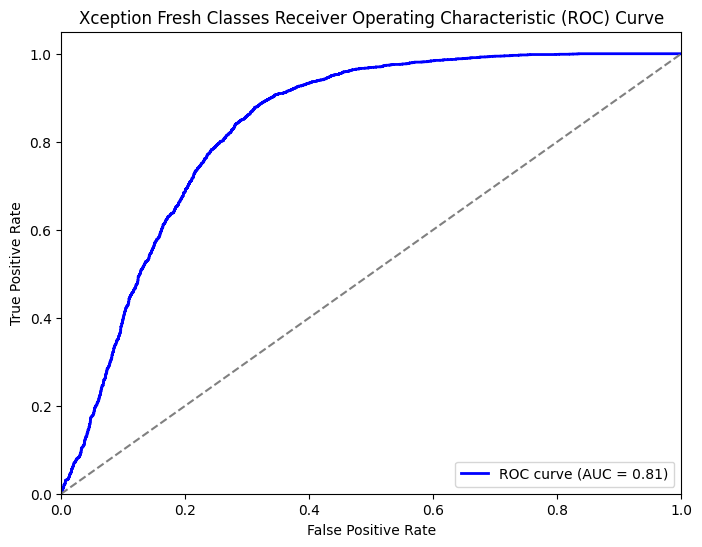

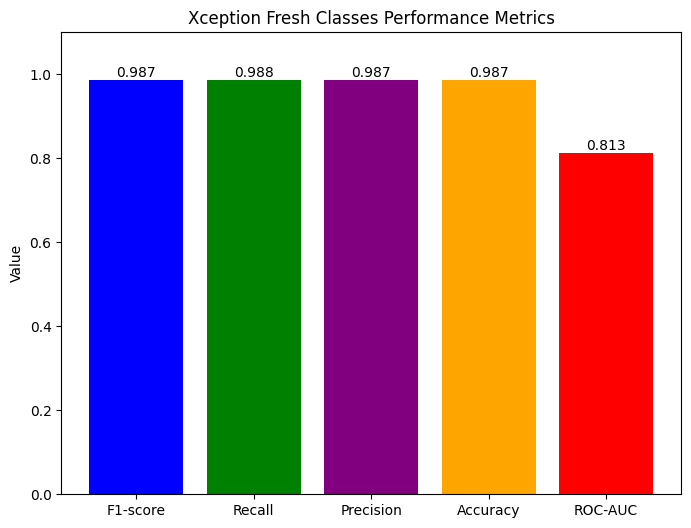

In [8]:
save_metric_path = Path("metrics")
save_metric_path.mkdir(exist_ok=True)

create_test_report(model_20, test_ds, train_class_names, "ResNet20", save_metric_path / "resnet20")
create_test_report(resnet50_model, test_ds, train_class_names, "ResNet50", save_metric_path / "resnet50")
create_test_report(xception_model, test_ds, train_class_names, "Xception", save_metric_path / "xception")


## Ensemble

Se crea un modelo conjunto en el cual se selecciona la clase por mayoría de votos. En caso de haber empate se selecciona la predicción del modelo de mejor rendimiento, en este caso ResNet20.

211/211 [==============================] - 28s 133ms/step


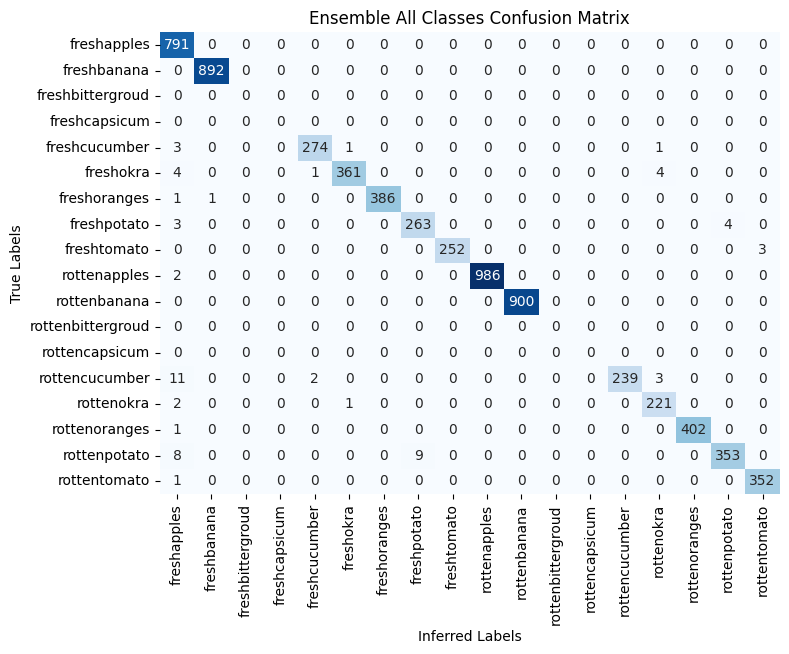

                precision    recall  f1-score   support

   freshapples      0.956     1.000     0.978       791
   freshbanana      0.999     1.000     0.999       892
 freshcucumber      0.989     0.982     0.986       279
     freshokra      0.994     0.976     0.985       370
  freshoranges      1.000     0.995     0.997       388
   freshpotato      0.967     0.974     0.970       270
   freshtomato      1.000     0.988     0.994       255
  rottenapples      1.000     0.998     0.999       988
  rottenbanana      1.000     1.000     1.000       900
rottencucumber      1.000     0.937     0.968       255
    rottenokra      0.965     0.987     0.976       224
 rottenoranges      1.000     0.998     0.999       403
  rottenpotato      0.989     0.954     0.971       370
  rottentomato      0.992     0.997     0.994       353

      accuracy                          0.990      6738
     macro avg      0.989     0.985     0.987      6738
  weighted avg      0.990     0.990     0.990 

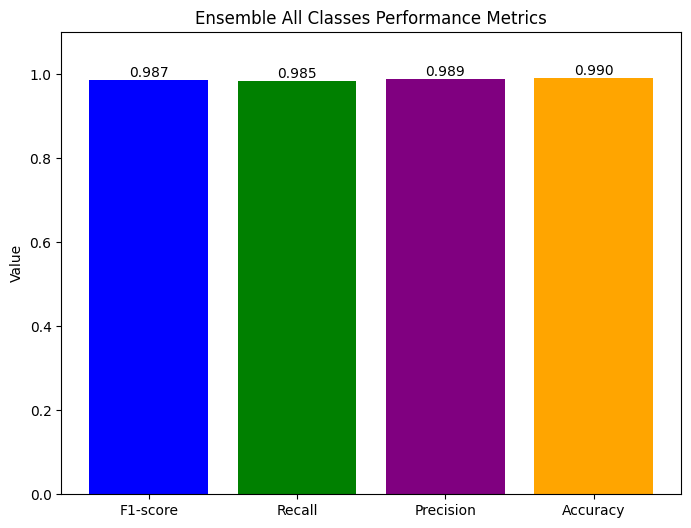

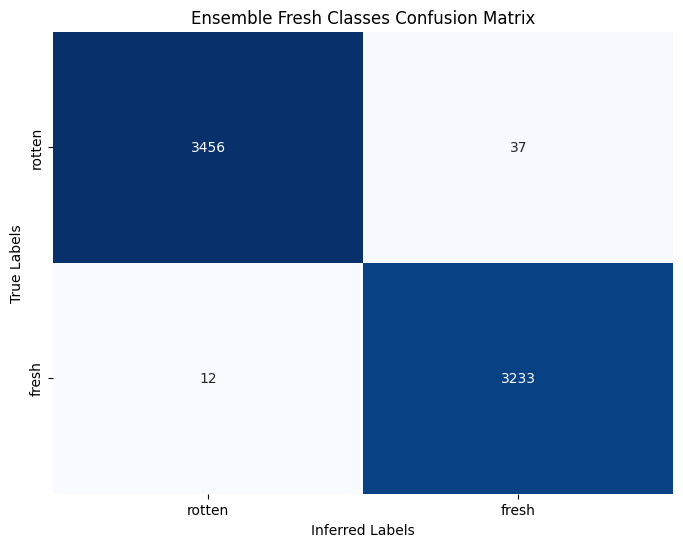

              precision    recall  f1-score   support

       fresh      0.989     0.996     0.992      3245
      rotten      0.997     0.989     0.993      3493

    accuracy                          0.993      6738
   macro avg      0.993     0.993     0.993      6738
weighted avg      0.993     0.993     0.993      6738



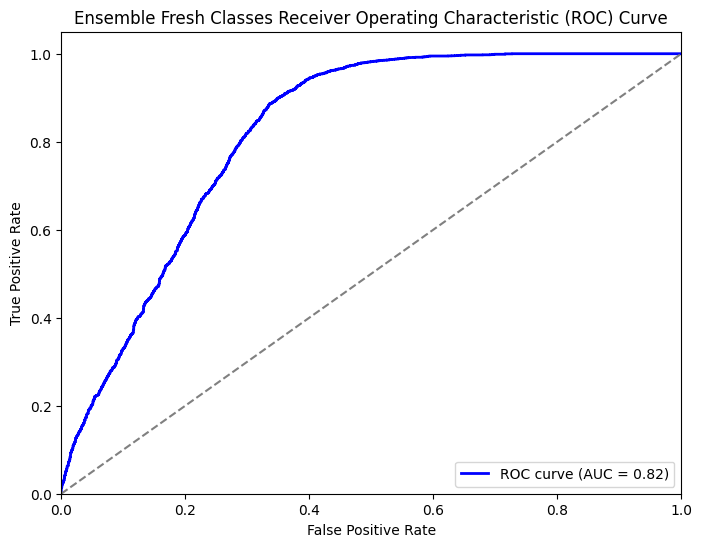

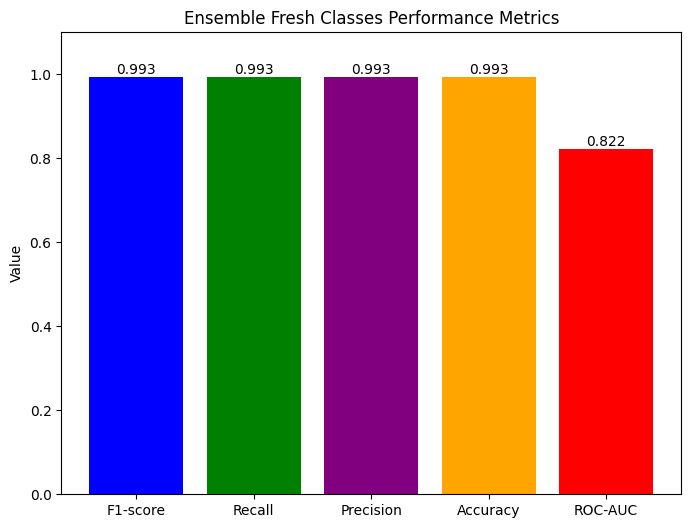

In [9]:
from collections import Counter

def counting_ensemble(models, default_model_result, class_names):
    """
    Counting Ensemble for combining predictions from multiple models using TensorFlow.

    models: List of models. Each model returns a tensor representing categorical probabilities.
    default_model_result: Default model result to break ties when there is a draw in the most counted class.
    class_names: List of string representing the class names.
    
    Returns: The final class based on the most counted class or the default model result in case of a tie.
    """

    # Initialize a dictionary to store the counts of each class across all models
    class_counts = Counter()

    # Aggregate the class probabilities from all models
    for model_probs in models:
        # Find the index of the class with the highest probability for each model
        predicted_class = tf.argmax(model_probs, axis=-1).numpy()
        # Increment the count for the predicted class
        class_counts[predicted_class] += 1

    # Find the most common class and its count
    most_common_class, count_most_common = class_counts.most_common(1)[0]

    # Check if there's a tie (more than one class with the same highest count)
    ties = [cls for cls, count in class_counts.items() if count == count_most_common]

    # If there is a tie, return the default model result
    if len(ties) > 1:
        return class_names[default_model_result]

    # Otherwise, return the most common class
    return class_names[most_common_class]

def ensemble_model(models, test_ds, class_names, best_model_index, save_path=None):
    """
    Given a list of `models` return the counting ensemble of the images in `test_ds`. In case of a draw the class in
    `best_model_index` is returned. If `save_path` is None then no metrics are computed.
    """
    probs = []
    for model in models:
        current_probs = model.predict(test_ds)
        probs.append(current_probs)
    
    inferred_labels = []
    for model_probs in zip(*probs):
        final = counting_ensemble(model_probs, best_model_index, class_names)
        inferred_labels.append(final)
    
    
    if save_path:
        save_path.mkdir(exist_ok=True)
        
        true_labels = []
        for true_label in test_ds.unbatch().map(lambda x,y: y):
            true_label = class_names[tf.argmax(true_label)]
            true_labels.append(true_label)

        metrics = print_report(true_labels, inferred_labels, class_names, None, None, "Ensemble All Classes", save_path)

        rotten_indexes = [i for i, label in enumerate(class_names) if label.startswith("rotten")]

        binary_inferred_labels = ["rotten" if label.startswith("rotten") else "fresh" for label in inferred_labels]
        binary_true_labels = ["rotten" if label.startswith("rotten") else "fresh" for label in true_labels]
        binary_true_labels_indexes = [[1, 0] if label.startswith("rotten") else [0, 1] for label in true_labels] 
        binary_pred_result = [reduce_prob(sum(value) / len(value), rotten_indexes) for value in zip(*probs)]

        binary_metrics = print_report(binary_true_labels, binary_inferred_labels, ["rotten", "fresh"], binary_true_labels_indexes, binary_pred_result, f"Ensemble Fresh Classes", save_path)

        with (save_path / "metrics.obj").open("wb") as file:
            pickle.dump({
                "all_classes_metrics": metrics,
                "binary_metrics": binary_metrics,
            }, file)
        
    return inferred_labels

ensemble_inferred = ensemble_model([model_20, resnet50_model, xception_model], test_ds, train_class_names, 0, save_metric_path / "ensemble")


### ResNet20

**Matriz de confusión de todas las clases:**

Se muestra que el modelo se equivoca más en la clasificación de papas podridas, las cuales las clasifica como papas frescas (30), luego se encuentra la clasificación incorrecta de pepinos frescos por quimbombó fresco (17).

![All Confusion Matrix Resnet20](metrics/resnet20/all_classes_confusion_matrix.png)

**Matriz de confusión binaria:**

Se observa una tendencia mayor a clasificar en frescos alimentos podridos.

![Binary Confusion Matrix Resnet20](metrics/resnet20/binary_confusion_matrix.png)

**Curva ROC:**

Presenta una curva en la el radio de verdaderos positivos es casi en su totalidad 1.

![ROC Resnet20](metrics/resnet20/roc.png)

### ResNet50V2

**Matriz de confusión de todas las clases:**

Se muestra que el modelo se equivoca más en la clasificación de papas frescas, las cuales las clasifica como papas podridas (22), a diferencia de ResNet20 este modelo presenta más fallos en sus clasificaciones y son más dispersas.

![All Confusion Matrix Resnet50](metrics/resnet50/all_classes_confusion_matrix.png)

**Matriz de confusión binaria:**

Se observa una tendencia mayor a clasificar en podridos alimentos frescos, un comportamiento inverso al de ResNet20.

![Binary Confusion Matrix Resnet50](metrics/resnet50/binary_confusion_matrix.png)

**Curva ROC:**

Presenta una curva por encima de la curva aleatoria, con un rendimiento inferior al de ResNet20.

![ROC Resnet50](metrics/resnet50/roc.png)

### Xception

**Matriz de confusión de todas las clases:**

Se muestra que el modelo, al igual que ResNet20, se equivoca más en la clasificación de papas podridas, las cuales las clasifica como papas frescas (21), luego se encuentra la clasificación incorrecta de quimbombó frescos por quimbombó podrido (16).

![All Confusion Matrix Xception](metrics/xception/all_classes_confusion_matrix.png)

**Matriz de confusión binaria:**

Se observa una tendencia mayor a clasificar en frescos alimentos podridos, al igual que ResNet20.

![Binary Confusion Matrix Xception](metrics/xception/binary_confusion_matrix.png)

**Curva ROC:**

Presenta una curva más pronunciada para arriba que ResNet50V2, indicando una clasificación más robusta.

![ROC Xception](metrics/xception/roc.png)

### Ensemble

Se hizo un ensemble por conteo con los tres modelos entrenados, en caso de empate se selecciona la clase inferida por el modelo ResNet20. Este modelo se desempeña mejor de manera general que sus elementos individuales.

**Matriz de confusión de todas las clases:**

La mayor afectación se observa en la clasificación incorrecta por el modelo de varias frutas en distintos estados como manzana fresca, esto ocurre unas 36 veces. Se observa también que el error al calsificar papas disminuye en comparación con los demás modelos.

![All Confusion Matrix Ensemble](metrics/ensemble/all_classes_confusion_matrix.png)

**Matriz de confusión binaria:**

Se observa una tendencia mayor a clasificar en frescos alimentos podridos, esto es probablemente a que la mayoría de los modelos (ResNet20 y Xception) poseen este comportamiento.

![Binary Confusion Matrix Ensemble](metrics/ensemble/binary_confusion_matrix.png)

**Curva ROC:**

Dado que el método de ensemble utilizado no utiliza de manera directa las probabilidades, estas fueron aproximadas como el promedio de las distribuciones de los tres modelos. Notar que la clase resultante del mayor promedio no tiene por que ser la seleccionada por el método de conteo.

![ROC Ensemble](metrics/ensemble/roc.png)

### Métricas comparativas

| Modelo   | Accuracy | Precision | Recall  | F1      |Binary Accuracy| Binary Precision | Binary Recal | Binary F1 | AUC-ROC |
| --       | --       | --        | --      | --      | --            | --               | --           | --        | --      |
|ResNet20  | 0.983    | 0.976     | 0.975   | 0.975   | 0.990         | 0.990            | 0.990        | 0.990     | **1.00**|
|ResNet50V2| 0.965    | 0.889*    | 0.889*  | 0.888*  | 0.979         | 0.980            | 0.978        | 0.979     | 0.765   |
|Xception  | 0.983    | 0.973     | 0.974   | 0.973   | 0.987         | 0.987            | 0.988        | 0.987     | 0.813   |
|Ensemble  | **0.990**| **0.989** |**0.985**|**0.987**| **0.993**     | **0.993**        | **0.993**    | **0.993** | 0.822** |

- *: Esta métrica toma en cuenta una clase con ninguna participación en el conjunto de entrenamiento, por lo que sus valores de precisión y recobrado son 0, contribuyendo negativamente a estas métricas.
- **: Los porcientos son calculados como el promedio devuelto por los modelos, la clase resultante del mayor promedio no tiene por que ser la seleccionada por el método de conteo.



## Análisis de los errores

Se muestran los errores de clasificación. En primer lugar los errores de clasificación entre fresco y podrido y luego entre todas las clases de frutas.

### Errores entre frescos y podridos en un mismo ingrediente

- Papas: Los modelos poseen una gran tendencia a clasificar de manera incorrecta el estado de las papas.
- Quimbombó y Pepino: Aunque en menor proporción estos ingredientes tienden también a ser clasificados incorrectamente.

### Errores en clasificación de ingredientes

- Quimbombó y Pepino se confunden mutuamente.
- Tomate y Manzana se confunden mutuamente (Especialmente en ResNet50V2)


In [ ]:
def show_image(image, title):
    plt.figure(figsize=(2, 2))
    plt.imshow(image.numpy().astype("uint8"))
    plt.title(title)
    plt.axis("off")
    plt.show()
    
def inferred_labels_error_analysis(inferred_labels, test_ds, class_names, binary=False):
    for pred_label, (image, true_label) in zip(inferred_labels, test_ds.unbatch()):
        true_label = class_names[tf.argmax(true_label)]
        if pred_label != true_label:
            if binary:
                if (pred_label.startswith("fresh") and not true_label.startswith("fresh")) or (pred_label.startswith("rotten") and not true_label.startswith("rotten")):
                    show_image(image, f"True: {true_label}\nPredicted: {pred_label}")
                else:
                    continue
            else:
                show_image(image, f"True: {true_label}\nPredicted: {pred_label}")

def model_error_analysis(model, test_ds, class_names, binary=False):
    pred_result, eval_result = evaluate_model(model, test_ds)
    
    for pred_label, (image, true_label) in zip(pred_result, test_ds.unbatch()):
        pred_label = class_names[tf.argmax(pred_label)]
        true_label = class_names[tf.argmax(true_label)]
        if pred_label != true_label:
            if binary:
                if (pred_label.startswith("fresh") and not true_label.startswith("fresh")) or (pred_label.startswith("rotten") and not true_label.startswith("rotten")):
                    show_image(image, f"True: {true_label}\nPredicted: {pred_label}")
                else:
                    continue
            else:
                show_image(image, f"True: {true_label}\nPredicted: {pred_label}")

print("Ensemble Binary")
inferred_labels_error_analysis(ensemble_inferred, test_ds, train_class_names, True)

print("Ensemble")
inferred_labels_error_analysis(ensemble_inferred, test_ds, train_class_names)
                
print("Resnet20 Binary")
model_error_analysis(model_20, test_ds, train_class_names, True)

print("Resnet50 Binary")
model_error_analysis(resnet50_model, test_ds, train_class_names, True)

print("Xception Binary")
model_error_analysis(xception_model, test_ds, train_class_names, True)

                
print("Resnet20")
model_error_analysis(model_20, test_ds, train_class_names)

print("Resnet50")
model_error_analysis(resnet50_model, test_ds, train_class_names)

print("Xception")
model_error_analysis(xception_model, test_ds, train_class_names)

